# animelytics! >///<
    CIS 545 | Carol Li | 10501401

### project structure, information
#### structure
1. **exploratory data analysis:** statistics, average, genre, ratings.
2. **feature selection and engineering**
    * drop unecessary columns with unecessary features
3. **modelling**
    * baseline model: linear regression.
    * comparison model: NN (?) decide when get here lol

#### links
https://www.kaggle.com/azathoth42/myanimelist

**using:**
* `anime_cleaned.csv`
* `animelist_cleaned.csv`

submission requires presentation, blog post, or session with craig.

## Project Information
TODO: write

## **0.** Packages and Data

In [1]:
# installing required packages
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb

# baseline regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn import metrics

from sklearn.tree import export_graphviz
from matplotlib import rcParams

# graph display
import joblib

# currently unused
import pydot
from IPython.display import Image

### Anime List Data
On MAL, users can create lists (known was Anime Lists) comprised of anime they have watched (which also keeps track of the episodes they've watched—very handy!!) and rate the anime out of a scale of 10. 

The following data, from `animelists_cleaned.csv` which essentially eradicates all completely null accounts and obvious bots, contains information from 31284030 users' Anime Lists.

In [2]:
# loading user animelist data
animelist_data = './data/animelists_cleaned.csv'
animelist_df = pd.read_csv(animelist_data)
animelist_df

username  anime_id  my_watched_episodes my_start_date  \
0                 karthiga        21                  586    0000-00-00   
1                 karthiga        59                   26    0000-00-00   
2                 karthiga        74                   26    0000-00-00   
3                 karthiga       120                   26    0000-00-00   
4                 karthiga       178                   26    0000-00-00   
...                    ...       ...                  ...           ...   
31284025     Yokonightcore     15611                   48    2014-00-00   
31284026     Yokonightcore     27815                   22    0000-00-00   
31284027            wargod      5945                   39    0000-00-00   
31284028  JMc_SetoKai_LoVe      1316                   52    0000-00-00   
31284029    hinogurl_mikha      1744                   58    0000-00-00   

         my_finish_date  my_score  my_status  my_rewatching  my_rewatching_ep  \
0            0000-00-00         9          1            NaN                 0   
1            0000-00-00         7          2            NaN                 0   
2            0000-00-00         7          2            NaN                 0   
3            0000-00-00         7          2            NaN                 0   
4            0000-00-00         7          2            0.0                 0   
...                 ...       ...        ...            ...               ...   
31284025     0000-00-00         9          1            NaN                 0   
31284026     0000-00-00         9          1            NaN                 0   
31284027     0000-00-00         8          2            0.0                 0   
31284028     0000-00-00         9          2            NaN                 0   
31284029     0000-00-00        10          1            0.0                 0   

              my_last_updated my_tags  
0         2013-03-03 10:52:53     NaN  
1         2013-03-10 13:54:51     NaN  
2         2013-04-27 16:43:35     NaN  
3         2013-03-03 10:53:57     NaN  
4         2013-03-27 15:59:13     NaN  
...                       ...     ...  
31284025  2015-09-07 17:33:03     NaN  
31284026  2015-09-07 17:32:05     NaN  
31284027  2010-03-29 04:24:12     NaN  
31284028  2009-12-23 05:45:14     NaN  
31284029  2008-04-05 11:36:20     NaN  

[31284030 rows x 11 columns]

### Anime Rating Data
The following .csv, `anime_cleaned.csv`, contains ratings of all the anime listed in MAL.

TODO: more nuance for what cleaned means.

In [3]:
# loading anime rating data
anime_data = './data/anime_cleaned.csv'
anime_df = pd.read_csv(anime_data)

**notes on columns:**
* rating refers to maturity rating
* scored by refers to number of ratings for data

In [4]:
# all columns of anime_df
anime_df.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme', 'duration_min',
       'aired_from_year'],
      dtype='object')

In [5]:
# all genres of values in anime_df
for genre in anime_df['genre']:
    print('***')
    print(genre)
    
# TODO: want to split by each individual value and put into separate columns - is this possible? -> look at tds link

***
Comedy, Supernatural, Romance, Shounen
***
Comedy, Parody, Romance, School, Shounen
***
Comedy, Magic, School, Shoujo
***
Comedy, Drama, Magic, Romance, Fantasy
***
Comedy, Drama, Romance, Shounen
***
Kids, School, Shoujo
***
Magic, Comedy, Romance, School, Shoujo
***
Action, Drama, Fantasy, Romance, School, Supernatural
***
Music, Slice of Life, Comedy, Romance, Josei
***
Comedy, Harem, Romance, School, Shoujo
***
Comedy, Drama, Romance, Shounen Ai
***
Comedy, Romance, School, Shoujo
***
Comedy, Drama, Romance, Shounen Ai
***
Slice of Life, Comedy, Romance, School, Shoujo
***
Action, Adventure, Comedy, Super Power, Supernatural, Shounen
***
Sci-Fi, Comedy, Drama, Romance, Ecchi, Seinen
***
Slice of Life, Drama, Romance, School, Shoujo
***
Action, Adventure, Comedy, Super Power, Martial Arts, Shounen
***
Slice of Life, Comedy, Martial Arts, Fantasy
***
Slice of Life, Comedy, Romance, School
***
Comedy, Drama, Romance, Shounen
***
Comedy, School, Shoujo, Super Power
***
Comedy, Dram

***
Action, Military, Super Power, Magic
***
Action, Comedy, Romance
***
Action, Adventure, Magic, Martial Arts, Fantasy
***
Action, Magic, Fantasy, School
***
Action, Historical, Kids
***
Game
***
Slice of Life, Comedy
***
Comedy, Magic, Supernatural
***
Comedy, Romance, Sci-Fi, Shounen
***
Action, Adventure, Mecha, Police, Sci-Fi
***
Parody, Comedy, School
***
Comedy, Josei, Slice of Life
***
Action, Comedy, Supernatural, Ecchi
***
Comedy, Romance
***
Kids, School, Shoujo
***
Romance, School, Shoujo
***
Dementia, Horror, Psychological
***
Action, Adventure, Fantasy
***
Comedy, Demons, Ecchi, Romance, School
***
Slice of Life, Supernatural, Fantasy
***
Action, Ecchi, Harem, Magic
***
Hentai
***
Action, Mecha, Drama, Sci-Fi, Shounen
***
Adventure, Demons, Drama, Fantasy, Magic
***
Slice of Life, Comedy
***
Hentai
***
Action, Comedy, Drama, Magic, Seinen
***
Drama, Historical
***
Action, Sci-Fi, Adventure, Comedy, Drama, Romance
***
Action, Drama, Fantasy, Shounen, Super Power
***
Comed

***
School, Supernatural
***
Action, Sci-Fi, Harem, Comedy, Romance, Ecchi, Fantasy, School
***
Action, Comedy, Romance, School
***
Comedy, School, Shounen, Sports
***
Romance, School, Shoujo
***
Game, Psychological
***
Romance, Shoujo
***
Comedy, Kids, Magic, Military, Sci-Fi
***
Adventure, Kids
***
Action, Comedy, Romance, Fantasy, School, Shounen
***
Action, Adventure, Fantasy, Comedy
***
Ecchi, Drama
***
Music
***
Comedy, School, Seinen, Slice of Life
***
Action, Adventure, Drama, Shounen, Supernatural
***
Action, Harem, Demons, Romance, Ecchi, Fantasy
***
Romance, School, Shoujo
***
Kids, Adventure, Fantasy, Magic
***
Comedy, Ecchi, Slice of Life
***
Action, Military, Sci-Fi, Adventure, Space, Drama, Mecha
***
Action, Adventure, Mecha, Military, Romance, Sci-Fi, Space
***
Fantasy, Magic, Comedy, Shoujo
***
Game
***
Hentai, Demons, Supernatural
***
Game, Slice of Life, School
***
Drama, Historical
***
Action, Harem, Comedy, Supernatural, Magic, Ecchi
***
Comedy, Drama, Fantasy, Mag

Romance, School, Shoujo
***
Comedy, School, Seinen, Slice of Life
***
Action, Mecha, Sci-Fi, Super Power
***
Comedy, Slice of Life
***
Comedy, Fantasy, Game
***
Mystery, Sci-Fi
***
Drama, School, Super Power
***
Kids
***
Military, Adventure, Drama, Magic, Fantasy, Shounen
***
Adventure, Comedy, Kids, Fantasy, Shounen
***
Comedy
***
Action, Super Power, Psychological, Supernatural
***
Hentai
***
Slice of Life, Comedy, Parody, Magic, School
***
Military, Sci-Fi, Adventure, Space, Drama, Romance, Mecha
***
Comedy, Shoujo Ai, Slice of Life
***
Action, Sci-Fi, Horror, Police, Supernatural
***
Comedy, Fantasy, Magic, Romance, Sci-Fi
***
Adventure, Drama, Historical, Slice of Life
***
Action, Adventure, Fantasy, Hentai
***
Comedy, Slice of Life
***
Action, Fantasy
***
Drama, Mecha, Military, Romance, Sci-Fi, Shounen, Slice of Life
***
Historical, Drama, Shoujo
***
Action, Adventure, Mystery, Comedy, Seinen
***
Mystery, Horror, Supernatural
***
Action, Adventure, Romance, Sci-Fi, Shounen, Supe

Action, Comedy, Police, Shounen
***
Fantasy, Kids
***
Sci-Fi, Magic, Fantasy
***
Comedy, Romance, Slice of Life
***
Action, Supernatural, Fantasy
***
School
***
Comedy, Parody, Ecchi, Fantasy
***
Comedy, School, Shounen
***
Comedy
***
Action, Comedy, Supernatural, Martial Arts, Shounen
***
Comedy, Ecchi, Shounen, Sports
***
Comedy, Demons, Supernatural, Romance, Fantasy, Shoujo
***
Sci-Fi, Comedy, Kids
***
Action, Sci-Fi, Space, Horror, Drama, Seinen
***
Harem, Mystery, Comedy, Romance, Ecchi, School
***
Comedy, School, Slice of Life
***
Action, Sci-Fi, Adventure, Comedy, Fantasy, Shounen
***
Action, Sci-Fi, Adventure
***
Action, Adventure, Comedy, Mystery, Romance
***
Comedy, Historical, Parody
***
Action, Harem, Demons, Romance, Ecchi, Fantasy
***
Action, Adventure, Comedy, Shounen
***
Action, Drama, Horror, School, Seinen, Supernatural
***
Comedy, Magic, Fantasy
***
Slice of Life, Comedy
***
Sci-Fi, Adventure, Mecha, Shounen
***
Action, Comedy, Martial Arts, Shounen, Super Power
***

***
Comedy, Kids
***
Demons, Horror, Parody
***
Sci-Fi, Slice of Life, Space, Comedy, Mecha, Seinen
***
Hentai
***
Ecchi, Fantasy, Romance, Comedy, Shounen
***
Action, Comedy, Demons, Fantasy, Magic
***
Action, Comedy, Police, Seinen
***
Sci-Fi, Comedy
***
Adventure, Fantasy, Shoujo
***
Comedy, Music, Slice of Life
***
Action, Sports, Military, School
***
Action, Romance, Ecchi, Fantasy, School
***
Action, Adventure, Cars, Comedy, Kids, Police
***
Action, Comedy
***
Action, Mystery, Police, Shounen
***
Slice of Life, Kids
***
Hentai
***
Comedy
***
Comedy, Parody, Romance, Ecchi, School
***
Slice of Life, Comedy, School
***
Adventure, Slice of Life, Mystery, Historical, Supernatural, Fantasy, Seinen
***
Comedy
***
Sci-Fi, Comedy
***
Action, Sci-Fi, Adventure, Super Power, Drama
***
Slice of Life
***
Comedy, Drama, Romance
***
Comedy, Slice of Life
***
Action, Adventure, Mecha, Sci-Fi
***
Slice of Life, Historical, Drama, Shoujo
***
Adventure, Music
***
Action, Adventure, Comedy, Drama, 

***
Comedy
***
Comedy, Ecchi, Fantasy, Harem, Magic, Romance, School, Shounen, Super Power, Supernatural
***
Action, Military, Sci-Fi, Magic, Ecchi
***
Comedy, School, Slice of Life
***
Harem, Comedy, Romance, Ecchi, Fantasy, Seinen
***
Adventure, Fantasy
***
Comedy, Drama, Romance, Ecchi
***
Drama, Hentai, Romance
***
Comedy, Historical
***
Adventure, Comedy, Fantasy, Magic, Romance, Shoujo
***
Action, Magic, Supernatural, Sci-Fi
***
Cars, Seinen, Sports
***
Comedy, Parody, Mecha
***
Action, Horror, Supernatural, Vampire, Seinen
***
Slice of Life, Fantasy, Drama
***
Action, Sci-Fi, School
***
Action, Fantasy, Super Power
***
Action, Adventure, Comedy, Supernatural, Shounen
***
Action, Comedy, Ecchi, Shoujo Ai, Super Power
***
Drama, Fantasy, Psychological, Supernatural
***
Adventure, Comedy, Drama, Fantasy, Magic, Romance, Shoujo
***
Action, Adventure, Comedy, Historical, Romance, Samurai
***
Hentai, School
***
Action, Music, Sci-Fi
***
Action, Sci-Fi, Adventure, Space, Drama
***
Hent

Comedy, School
***
Drama, Shoujo
***
Comedy, Kids
***
Slice of Life, Comedy, Romance, School, Seinen
***
Action, Sci-Fi
***
Comedy, Parody
***
Action, Military, Sci-Fi, Space, Comedy, Parody, Mecha
***
Action, Adventure, Comedy, Shounen
***
Ecchi, School, Shounen
***
Comedy, Magic
***
Adventure, Supernatural
***
Drama, Romance, School
***
Adventure, Fantasy, Shounen
***
Adventure, Supernatural, Fantasy, Shounen
***
Action, Sci-Fi, Comedy, Parody, Super Power, Supernatural, Seinen
***
Action, Sci-Fi, Adventure, Mecha
***
Slice of Life, Comedy, Fantasy
***
Hentai
***
Parody, Yaoi
***
Comedy, Romance, Supernatural
***
Adventure, Demons, Drama, Fantasy, Historical, Romance, Shounen, Supernatural
***
Hentai
***
Music
***
Action, Comedy, Martial Arts, Seinen
***
Supernatural
***
Hentai
***
Action, Fantasy, Magic, Super Power, Supernatural
***
Music, Slice of Life, Comedy, School
***
Comedy
***
Drama, Historical, Slice of Life
***
Action, Historical, Demons, Supernatural, Romance
***
Slice of

Action, Super Power, Supernatural, Thriller
***
Action
***
Action, Adventure, Demons, Drama, Fantasy, Horror, Magic, Military, Romance, Supernatural
***
Ecchi, Sports, Comedy, School
***
Hentai
***
Comedy, Kids, Super Power
***
Adventure, Drama, Fantasy
***
Military, Sci-Fi, Adventure, Drama, Romance, Mecha
***
Action, Adventure, Fantasy, Sci-Fi
***
Action, Mecha
***
Drama, Historical, Psychological, Seinen
***
Slice of Life, School
***
Action, Sci-Fi, Drama, Mecha
***
Slice of Life, Drama, Romance
***
Comedy, Romance, School, Super Power
***
Comedy, Parody, School, Sci-Fi, Shounen
***
Adventure, Drama, Martial Arts, Romance, Shounen, Supernatural
***
Comedy, Ecchi, School, Seinen
***
Hentai
***
Adventure, Hentai, Magic, Sci-Fi
***
Sci-Fi, Sports
***
Comedy, Fantasy, Magic, Slice of Life
***
Comedy, Ecchi, Harem, Romance, Seinen
***
Comedy, Romance, School, Shoujo
***
Horror, Mystery, Supernatural
***
Action, Comedy, Shounen
***
Adventure
***
Slice of Life, Comedy
***
Slice of Life, Ro

***
Action, Fantasy, Shounen Ai, Super Power, Supernatural
***
Adventure, Comedy, Demons, Supernatural, Magic, Fantasy, Shounen
***
Action, Comedy, Drama, Fantasy, Magic, School, Sci-Fi, Shounen, Slice of Life, Super Power, Supernatural
***
Action, Harem, Comedy, Supernatural, Romance, Ecchi, Fantasy, School
***
Slice of Life
***
Hentai
***
Adventure, Historical, Sci-Fi
***
Comedy, Police, Supernatural, Vampire, Shounen
***
Comedy, School, Shounen, Sports
***
Drama, Shounen, Sports
***
Music, Shoujo, Sports
***
Slice of Life
***
Ecchi, Romance, School
***
Action, Drama, Fantasy, Romance, School, Supernatural
***
Slice of Life, Comedy, School, Seinen
***
Fantasy, Space
***
Drama, Music, Romance, Slice of Life
***
Drama, Historical, Kids, Slice of Life
***
Drama, Shoujo
***
Harem, Drama, Romance, School
***
Action, Mystery, Horror, Psychological, Supernatural, Drama
***
Hentai
***
Action, Super Power, Supernatural
***
Action, Sci-Fi, Adventure, Space, Comedy, Shounen
***
Fantasy
***
Adve

***
Action, Comedy, Romance, Martial Arts, Seinen
***
Comedy, Ecchi, Harem, Romance, Supernatural
***
Comedy, Supernatural, Romance, School, Seinen
***
Action, Horror, Drama, Fantasy
***
Comedy, School
***
Action, Space, Mecha, Romance, Military, Drama, Sci-Fi
***
Sci-Fi, Comedy, Ecchi
***
Action, Sci-Fi, Horror, Demons, Supernatural
***
Romance, School, Shoujo Ai
***
Mecha, Music
***
Action, Military, Sci-Fi, Space, Drama
***
Action, Adventure, Historical, Martial Arts, Romance
***
Adventure, Slice of Life, Comedy
***
Action, Comedy, Martial Arts, Mystery, Super Power, Supernatural
***
Comedy, Drama, School, Shounen, Slice of Life
***
Adventure, Comedy, Fantasy, Shounen
***
Hentai
***
Action, Adventure, Ecchi, Fantasy
***
Music
***
Comedy, Shounen
***
Action, Ecchi, Martial Arts
***
Music
***
Slice of Life, Comedy, School, Seinen
***
Supernatural, Drama
***
Adventure, Comedy, Demons, Fantasy, Shoujo
***
Action, Police, Drama, Shounen
***
Kids
***
Sci-Fi, Adventure, Space, Supernatural

Comedy, Drama, Ecchi, Fantasy, Harem, Magic, Romance, School, Seinen
***
Kids
***
Comedy, School, Slice of Life
***
Comedy, Drama, Romance, Shounen Ai
***
Action, Military, Sci-Fi, Space, Drama
***
Action, Sci-Fi, Adventure, Space, Mecha
***
Adventure, Comedy, Demons, Fantasy, Shoujo
***
Action, Sci-Fi, Adventure, Sports, Shounen
***
Kids, Magic
***
Adventure, Drama, Fantasy, Shoujo
***
Fantasy
***
Action, Adventure, Comedy, Mecha, Sci-Fi
***
Comedy, Kids
***
Adventure, Comedy, Fantasy, Shounen
***
Drama, Romance, Sci-Fi
***
Hentai
***
Adventure, Fantasy
***
Action, Martial Arts, Comedy, School, Shounen
***
Adventure, Comedy, Slice of Life, Super Power
***
Action, Kids, Mecha
***
Action, Martial Arts, Historical
***
Comedy, Magic, Fantasy
***
Action, Magic
***
Sci-Fi, Adventure, Romance, Fantasy, Josei
***
Action, Drama, Shounen, Sports
***
Comedy, Fantasy, Kids
***
Adventure, Comedy, Mystery, Police, Shounen, Sports
***
Action, Fantasy, Magic, Shoujo
***
Adventure, Comedy, Fantasy, Hi

Sci-Fi, Adventure, Mecha, Shounen
***
Action, Mecha, Historical
***
Comedy, Mystery, Super Power
***
Music, Slice of Life, School, Shoujo
***
Action, Mystery, Supernatural, Drama, Romance, Thriller
***
Comedy, School
***
Horror, Mystery, Romance, School, Shounen, Supernatural
***
Action, Ecchi, Comedy, Harem, Romance, Demons, School
***
Action, Adventure, Drama, Mecha, Sci-Fi
***
Romance, Shoujo
***
Action, Historical, Samurai
***
Action, Fantasy
***
Music
***
Action, Adventure, Comedy, Drama, Fantasy, Shounen
***
Comedy, Romance, Sci-Fi
***
Action, Sci-Fi, Horror
***
Action, Adventure, Drama, Fantasy
***
Action, Martial Arts, Hentai
***
Hentai
***
Comedy, Romance, School, Shounen
***
Mecha, Sci-Fi, Shounen, Sports
***
Adventure, Military, Romance
***
Action, Adventure, Fantasy, Supernatural, Historical, Drama
***
Action, Adventure, Comedy, Supernatural, Shounen
***
Comedy, Ecchi, Romance, Shounen, Slice of Life
***
Comedy, Drama, Ecchi, Harem, Romance, Sci-Fi, Shounen, Supernatural
**

Action, Comedy, Super Power, Supernatural, Shounen
***
Drama, Magic, Romance, Shoujo
***
Action, Ecchi, Comedy, Mecha
***
Adventure, Comedy, Mystery, Shounen
***
Action, Ecchi, Martial Arts, Comedy, Super Power, School, Shounen
***
Military, School
***
Action, Sci-Fi, Adventure
***
Action, Fantasy, Magic, Shoujo
***
Action, Sci-Fi, Comedy, Super Power, Supernatural, Shounen
***
Fantasy, Magic, Shoujo
***
Comedy, Drama, Ecchi, Romance, Shounen
***
Hentai
***
Game, Slice of Life, Comedy
***
Comedy, Fantasy, Parody
***
Slice of Life, Comedy, School, Shoujo
***
Action, Sci-Fi, Adventure
***
Slice of Life, Supernatural
***
Action, Adventure, Sci-Fi, Shounen
***
Comedy
***
Slice of Life
***
Action, Sci-Fi, Shounen
***
Sci-Fi, Adventure, Space, Comedy, Sports, Drama, Romance, Martial Arts, Mecha
***
Action, Sci-Fi, Comedy, Parody, Mecha, School
***
Horror, Demons, Supernatural, Magic, Ecchi, Fantasy, Seinen
***
Comedy, Ecchi, School
***
Harem, Ecchi
***
Sci-Fi, Space, Mecha
***
Music
***
Acti

In [6]:
# all studios of values in anime_df -> easy grouping
for studio in anime_df['studio']:
    print('***')
    print(studio)

***
David Production
***
Gonzo
***
Satelight
***
Hal Film Maker
***
J.C.Staff
***
Studio Pierrot, Studio Hibari
***
Production Reed
***
J.C.Staff
***
J.C.Staff
***
Bones
***
Studio Deen
***
J.C.Staff
***
Studio Deen
***
Brain&#039;s Base
***
Studio Pierrot
***
Madhouse
***
Production I.G
***
Studio Pierrot
***
Studio Deen
***
J.C.Staff
***
J.C.Staff
***
Group TAC
***
Hal Film Maker
***
Madhouse
***
Studio Deen
***
Madhouse
***
TMS Entertainment
***
Pierrot Plus
***
Studio Pierrot
***
Tatsunoko Production
***
Hal Film Maker, TYO Animations
***
Shin-Ei Animation
***
Studio Deen
***
Madhouse
***
Toei Animation
***
Tokyo Movie Shinsha
***
Toei Animation
***
Madhouse
***
Sunrise
***
Zexcs
***
J.C.Staff
***
J.C.Staff
***
Sunrise
***
J.C.Staff
***
J.C.Staff
***
TMS Entertainment
***
Madhouse
***
J.C.Staff
***
Production I.G
***
Studio Deen
***
Studio Deen
***
Studio Deen
***
Yumeta Company
***
TMS Entertainment
***
Lerche
***
Studio Pierrot
***
Production I.G, Zexcs
***
Kachidoki Studio
***
G

***
SynergySP
***
Studio Gallop
***
Studio Pierrot
***
Studio Deen
***
Shin-Ei Animation
***
Production I.G
***
Madhouse
***
Brain&#039;s Base
***
Brain&#039;s Base
***
Kyoto Animation
***
ufotable
***
Nippon Animation
***
Gonzo
***
Toei Animation
***
Toei Animation
***
Production I.G
***
Studio Deen
***
Tokyo Kids
***
David Production
***
Studio Pierrot
***
Studio Ghibli, Studio Hibari
***
Studio Pierrot
***
Madhouse, Studio 4°C
***
Toei Animation
***
feel.
***
Sunrise
***
TYO Animations
***
Rabbit Machine
***
Studio Deen
***
J.C.Staff
***
Nippon Animation
***
Studio Pierrot
***
Hal Film Maker
***
Telecom Animation Film, Graphinica
***
Studio Pierrot
***
Sunrise
***
Studio Gallop
***
Sunrise
***
A-1 Pictures
***
Silver Link.
***
Studio Pierrot
***
Manglobe
***
Nippon Animation
***
Shin-Ei Animation
***
Polygon Pictures
***
Group TAC
***
Diomedea
***
TNK
***
AIC Plus+
***
Studio Deen
***
Picture Magic
***
Madhouse
***
AIC
***
Tezuka Productions
***
Studio Gallop
***
OLM
***
Production 

Studio 3Hz
***
AIC
***
Kachidoki Studio
***
Seven
***
Toei Animation
***
Satelight
***
J.C.Staff
***
Haoliners Animation League
***
Artland, AIC, Artmic
***
Satelight
***
Group TAC
***
TMS Entertainment
***
AIC
***
Lerche
***
Artland
***
Future Planet, Beijing Huihuang Animation Company
***
Sunrise
***
CoMix Wave Films
***
Studio Ghibli
***
J.C.Staff
***
Shin-Ei Animation
***
Toei Animation
***
Studio Deen
***
Trigger
***
Sunrise
***
ufotable, feel., Studio Flag
***
AIC A.S.T.A.
***
ufotable
***
J.C.Staff
***
Think Corporation
***
SynergySP
***
Vasoon Animation
***
Kachidoki Studio
***
J.C.Staff
***
Gainax
***
A-1 Pictures
***
Arms
***
Toei Animation
***
Tezuka Productions
***
Lay-duce
***
Toei Animation
***
Shin-Ei Animation
***
A-1 Pictures
***
Gonzo
***
TMS Entertainment, Telecom Animation Film
***
Sunrise
***
David Production
***
Shaft
***
TMS Entertainment
***
Hal Film Maker
***
Shin-Ei Animation
***
Studio Matrix
***
Toei Animation
***
Nomad
***
Actas
***
Toei Animation
***
Bridg

***
Panda Factory
***
Creators in Pack
***
Wit Studio
***
Doga Kobo
***
Studio PuYUKAI
***
PoRO
***
ILCA
***
Diomedea
***
Studio Pierrot
***
Sunrise
***
Studio Deen
***
White Fox
***
Ishikawa Pro
***
DLE
***
Doga Kobo
***
Tatsunoko Production
***
Production I.G
***
Toei Animation
***
Toei Animation
***
Toei Animation
***
Polygon Pictures
***
Production I.G
***
P.A. Works
***
8bit
***
T-Rex
***
Studio Pierrot
***
J.C.Staff
***
Sunrise
***
Ajia-Do
***
Actas
***
Toei Animation
***
Xebec
***
Haoliners Animation League
***
Kanaban Graphics
***
Production I.G
***
Studio Deen, DAX Production
***
Zero-G
***
Telecom Animation Film
***
Studio Ghibli, Polygon Pictures
***
TYPHOON GRAPHICS
***
Bones
***
Sunrise
***
GoHands
***
A-1 Pictures
***
Studio Gokumi
***
AIC Classic
***
TYO Animations
***
Gonzo
***
Seven
***
Actas
***
Xebec
***
TNK
***
Pops Inc.
***
Zexcs
***
Studio Gokumi
***
Ascension
***
Gathering
***
Charaction
***
Studio Ghibli
***
Toei Animation
***
Sotsu
***
TYO Animations
***
Tezuka

***
Madhouse
***
Studio Gallop, Studio Comet
***
Bones
***
J.C.Staff
***
Sunrise
***
ufotable
***
Xebec
***
Tatsunoko Production
***
Thundray
***
Haoliners Animation League
***
Team YokkyuFuman
***
Nippon Animation
***
Bones
***
Xebec
***
Animate Film
***
Studio 4°C
***
JCF
***
PoRO
***
Brain&#039;s Base
***
Studio Deen
***
Kyoto Animation
***
TMS Entertainment
***
Toei Animation
***
Gainax
***
Studio Colorido
***
Ajia-Do
***
Production I.G, Xebec
***
Studio Pierrot
***
Sunrise
***
Kyoto Animation
***
J.C.Staff
***
Sunrise, Studio Deen
***
Toei Animation
***
Gakken Eigakyoku
***
Brain&#039;s Base
***
Studio Eromatick
***
Tezuka Productions
***
Studio Fantasia
***
Nippon Animation
***
Natural High
***
Studio Pierrot
***
Rising Force
***
Tatsunoko Production
***
Toei Animation
***
Studio Pierrot
***
Madhouse
***
Studio Deen
***
Eiken, Studio Live
***
MAPPA
***
Studio Deen
***
Tatsunoko Production
***
Shaft
***
Production I.G
***
Madhouse
***
OLM
***
Joker Films
***
Gonzo
***
Japan Vistec

Polygon Pictures
***
Studio Binzo
***
Madhouse
***
Sunrise
***
Tatsunoko Production, Dongwoo A&amp;E
***
Asahi Production
***
Studio Deen
***
Triangle Staff
***
OLM
***
Nippon Animation
***
Sunrise
***
J.C.Staff
***
Yamamura Animation, Inc.
***
Shaft
***
TYO Animations
***
Kyoto Animation
***
Zexcs
***
Kazuki Production
***
Signal. MD
***
Sunrise
***
Madhouse
***
Toei Animation
***
ufotable
***
Tengu Kobo
***
Tatsunoko Production
***
Tatsunoko Production
***
Telecom Animation Film
***
Studio Deen
***
J.C.Staff
***
Toei Animation
***
Tatsunoko Production
***
Kyoto Animation
***
Asahi Production
***
Y.O.U.C
***
Nippon Animation
***
8bit
***
Nippon Animation
***
David Production
***
Manglobe
***
Daume
***
Shin-Ei Animation
***
Shaft
***
Silver Link., Connect
***
Eiken
***
Toei Animation
***
Hoods Entertainment
***
Studio Pierrot
***
Studio Deen
***
Gainax, Shaft
***
Production I.G
***
Studio Deen
***
Gainax, Fukushima Gainax
***
Sunrise
***
Madhouse
***
Tengu Kobo
***
Madhouse
***
Shaft
*

feel., Zexcs
***
Toei Animation
***
Haoliners Animation League, Pb Animation Co. Ltd.
***
Seven Arcs, Seven Arcs Pictures
***
Production Reed
***
Studio Ghibli
***
AIC
***
Sunrise
***
Actas
***
Shin-Ei Animation
***
Bones, Production Reed
***
Studio Jam
***
Sunrise
***
Tezuka Productions
***
Gonzo
***
Studio A-CAT
***
Studio Deen
***
Toei Animation
***
ufotable
***
Production I.G
***
DLE
***
Bones
***
Lay-duce
***
Arms
***
Polygon Pictures
***
A-1 Pictures
***
Seven
***
TMS Entertainment
***
Toei Animation
***
Sunrise
***
J.C.Staff
***
Shaft
***
Bridge, Husio Studio
***
Shaft
***
Gainax
***
Studio Gokumi
***
Yumeta Company
***
Polygon Pictures
***
Bones
***
Lerche
***
Studio Deen
***
Sugar Boy, Blue Cat
***
feel.
***
Pastel
***
Nippon Animation
***
A-1 Pictures
***
J.C.Staff
***
MAPPA
***
Daichi Doga, Dongyang Animation
***
Studio Deen
***
WAO World
***
PoRO
***
feel.
***
TMS Entertainment
***
Tatsunoko Production, Ordet
***
Arms
***
Studio 4°C
***
Sunrise
***
Nippon Animation
***
Prod

Toei Animation
***
Shin-Ei Animation
***
Collaboration Works
***
Xebec
***
Shaft
***
Toei Animation
***
Bee Train
***
J.C.Staff
***
Brain&#039;s Base
***
PoRO
***
OLM
***
Studio Pierrot
***
Sunrise
***
Tatsunoko Production
***
Shaft
***
Toei Animation
***
Production I.G
***
Studio Deen
***
AIC Plus+
***
Gainax, Magic Bus
***
Toei Animation
***
PrimeTime
***
Gonzo
***
DLE
***
TNK
***
Production I.G, Xebec
***
Tatsunoko Production, SynergySP
***
Studio Pierrot
***
Brain&#039;s Base
***
Shanghai Animation Film Studio
***
Shuka
***
Arms
***
Haoliners Animation League
***
Studio Gokumi
***
A.C.G.T.
***
TMS Entertainment
***
Nippon Animation
***
Zexcs
***
Tokyo Movie Shinsha
***
Production I.G
***
Seven Arcs Pictures
***
Nippon Animation
***
Studio Deen
***
RG Animation Studios
***
Brain&#039;s Base, Marvy Jack
***
Millepensee, GEMBA
***
Madhouse
***
Mushi Production
***
Bones
***
Echoes
***
DLE
***
Shin-Ei Animation
***
Usagi Ou
***
Brain&#039;s Base
***
Production I.G
***
Media Bank
***
Su

***
Brain&#039;s Base
***
Studio Ghibli
***
feel.
***
Telecom Animation Film
***
P.A. Works
***
Gathering, Lesprit
***
Asread
***
Puzzle Animation Studio Limited
***
Gathering
***
Shaft
***
Passione
***
Anime Antenna Iinkai
***
8bit
***
The Answer Studio
***
Tezuka Productions
***
Kinema Citrus
***
Kyoto Animation
***
Tokyo Kids
***
Craftar
***
Tatsunoko Production, Dongwoo A&amp;E
***
Eiken
***
Bones
***
AT-2
***
ufotable
***
David Production
***
Studio Gallop
***
Studio Deen
***
A-1 Pictures
***
Studio Blanc
***
Brain&#039;s Base
***
Gainax
***
Creators in Pack
***
Toei Animation
***
Signal. MD
***
Tatsunoko Production
***
Toei Animation
***
Toei Animation
***
Marza Animation Planet
***
Studio Pierrot
***
Toei Animation
***
Studio Hibari
***
Pie in The Sky
***
A-1 Pictures
***
AIC Spirits
***
ufotable
***
Ripple Film
***
Silver Link.
***
Tokyo Movie Shinsha
***
Production Reed
***
Doga Kobo
***
Hoods Entertainment
***
Studio Deen
***
Shaft
***
Gainax, feel.
***
MAPPA
***
Studio Gokum

***
AIC Classic
***
Gainax
***
Studio Ghibli
***
Knack Productions
***
APPP
***
PoRO
***
Shochiku Animation Institute
***
Kyoto Animation
***
Studio Gallop
***
Toei Animation
***
Mushi Production
***
Studio Pierrot
***
Shaft
***
Artland
***
CG Year
***
Kachidoki Studio
***
Arms
***
Office Takeout
***
Pie in The Sky
***
Shochiku Animation Institute
***
Bones
***
OLM
***
TMS Entertainment
***
J.C.Staff
***
DLE
***
TNK
***
DLE
***
Brain&#039;s Base
***
Toei Animation
***
Diomedea
***
A-1 Pictures
***
Kyoto Animation
***
Bones
***
Sunrise
***
Gathering
***
J.C.Staff
***
Madhouse
***
Toei Animation
***
T-Rex
***
Madhouse
***
Gonzo
***
Gainax, Asahi Production
***
Toei Animation
***
Studio Pierrot
***
Mushi Production
***
LIDENFILMS
***
OLM
***
Toei Animation
***
Madhouse
***
Shaft
***
Madhouse
***
Toei Animation
***
Zexcs
***
Sunrise
***
Gonzo
***
TMS Entertainment
***
Magic Bus
***
Doga Kobo
***
Tsukimidou
***
Zero-G
***
J.C.Staff
***
J.C.Staff
***
ufotable
***
Ashi Production
***
Studio P

In [7]:
# all airing years in anime_df
for date in anime_df['aired_from_year']:
    print('***')
    print(date)

***
2012.0
***
2007.0
***
2008.0
***
2002.0
***
2012.0
***
2009.0
***
2003.0
***
2007.0
***
2008.0
***
2006.0
***
2008.0
***
2010.0
***
2011.0
***
2012.0
***
2004.0
***
2002.0
***
2009.0
***
2007.0
***
1989.0
***
2008.0
***
2011.0
***
2004.0
***
2008.0
***
2013.0
***
2006.0
***
2011.0
***
2008.0
***
2011.0
***
2009.0
***
2011.0
***
2010.0
***
1992.0
***
2001.0
***
2006.0
***
1999.0
***
2005.0
***
2006.0
***
2007.0
***
2000.0
***
2010.0
***
2010.0
***
2006.0
***
2012.0
***
2010.0
***
2007.0
***
2012.0
***
1998.0
***
2000.0
***
2011.0
***
2011.0
***
2007.0
***
2008.0
***
2006.0
***
2016.0
***
2017.0
***
2002.0
***
2015.0
***
2016.0
***
1998.0
***
2011.0
***
2000.0
***
2010.0
***
2016.0
***
2016.0
***
2013.0
***
2008.0
***
2015.0
***
1997.0
***
2018.0
***
2016.0
***
2014.0
***
1994.0
***
2010.0
***
2001.0
***
2010.0
***
2005.0
***
2006.0
***
2010.0
***
2013.0
***
2016.0
***
2004.0
***
2014.0
***
2015.0
***
2013.0
***
2017.0
***
2017.0
***
1978.0
***
2017.0
***
1997.0
***
2015.0
***
2018.0

2003.0
***
1997.0
***
2015.0
***
1991.0
***
1980.0
***
2013.0
***
2011.0
***
2011.0
***
2015.0
***
2014.0
***
2012.0
***
1995.0
***
1994.0
***
2012.0
***
2017.0
***
2012.0
***
1985.0
***
2011.0
***
2007.0
***
2015.0
***
1998.0
***
2010.0
***
2007.0
***
2017.0
***
2015.0
***
2018.0
***
2016.0
***
2005.0
***
2012.0
***
2008.0
***
2007.0
***
2012.0
***
2014.0
***
2007.0
***
1994.0
***
1981.0
***
2017.0
***
2007.0
***
2001.0
***
2014.0
***
2014.0
***
2012.0
***
2017.0
***
2013.0
***
2005.0
***
1993.0
***
2013.0
***
2013.0
***
2015.0
***
2011.0
***
2015.0
***
2015.0
***
1984.0
***
1990.0
***
2013.0
***
2002.0
***
1989.0
***
2011.0
***
2005.0
***
1989.0
***
1996.0
***
2016.0
***
2017.0
***
2009.0
***
1982.0
***
1987.0
***
2006.0
***
2010.0
***
2012.0
***
2016.0
***
2015.0
***
2013.0
***
2008.0
***
1995.0
***
2013.0
***
1991.0
***
2012.0
***
2010.0
***
2016.0
***
2014.0
***
2015.0
***
2005.0
***
2014.0
***
2013.0
***
2004.0
***
2009.0
***
2014.0
***
2002.0
***
2002.0
***
2017.0
***
1996.0
***

2015.0
***
2002.0
***
2014.0
***
2006.0
***
1981.0
***
1997.0
***
1989.0
***
2001.0
***
2010.0
***
2002.0
***
2014.0
***
2016.0
***
1987.0
***
2014.0
***
2015.0
***
1999.0
***
2015.0
***
2011.0
***
2007.0
***
2010.0
***
2009.0
***
2013.0
***
2017.0
***
2009.0
***
1986.0
***
1984.0
***
2016.0
***
1992.0
***
1974.0
***
2009.0
***
1996.0
***
2014.0
***
2017.0
***
2007.0
***
2007.0
***
2017.0
***
1986.0
***
2003.0
***
2001.0
***
2001.0
***
1989.0
***
2015.0
***
2007.0
***
2006.0
***
2002.0
***
2013.0
***
1984.0
***
2017.0
***
2017.0
***
2009.0
***
2015.0
***
2013.0
***
2013.0
***
2012.0
***
2001.0
***
2011.0
***
2015.0
***
2015.0
***
1981.0
***
2010.0
***
2015.0
***
2018.0
***
2010.0
***
2012.0
***
1999.0
***
2004.0
***
2015.0
***
2015.0
***
2013.0
***
2001.0
***
1990.0
***
2015.0
***
1985.0
***
2007.0
***
2003.0
***
2018.0
***
2013.0
***
2018.0
***
2006.0
***
2013.0
***
2000.0
***
2018.0
***
2012.0
***
2015.0
***
2010.0
***
1994.0
***
2015.0
***
1998.0
***
2004.0
***
2006.0
***
2013.0
***

***
2005.0
***
2016.0
***
2011.0
***
2016.0
***
1999.0
***
2015.0
***
2000.0
***
2006.0
***
2006.0
***
2004.0
***
2000.0
***
2012.0
***
1994.0
***
2017.0
***
2005.0
***
2012.0
***
2011.0
***
2016.0
***
2016.0
***
1993.0
***
2003.0
***
2016.0
***
2010.0
***
2008.0
***
2016.0
***
2002.0
***
2017.0
***
2010.0
***
1995.0
***
2001.0
***
2014.0
***
2017.0
***
2007.0
***
2016.0
***
1997.0
***
2007.0
***
2012.0
***
2016.0
***
2007.0
***
2014.0
***
1995.0
***
1992.0
***
2008.0
***
2014.0
***
2003.0
***
2017.0
***
2007.0
***
2017.0
***
2016.0
***
2011.0
***
2008.0
***
2008.0
***
1989.0
***
1992.0
***
2002.0
***
2018.0
***
2006.0
***
2008.0
***
2012.0
***
2016.0
***
1994.0
***
1989.0
***
2015.0
***
1979.0
***
2010.0
***
2009.0
***
1985.0
***
2008.0
***
2017.0
***
2014.0
***
1968.0
***
2012.0
***
2016.0
***
2012.0
***
2018.0
***
2011.0
***
2014.0
***
1982.0
***
2007.0
***
2013.0
***
1998.0
***
2012.0
***
2009.0
***
2011.0
***
2016.0
***
2015.0
***
2010.0
***
2014.0
***
2016.0
***
2015.0
***
1993.0

2013.0
***
2017.0
***
2006.0
***
2005.0
***
2014.0
***
2009.0
***
2012.0
***
1986.0
***
2004.0
***
2011.0
***
2002.0
***
2000.0
***
2016.0
***
2015.0
***
2016.0
***
2014.0
***
1997.0
***
2017.0
***
2005.0
***
2014.0
***
2014.0
***
2012.0
***
2016.0
***
2004.0
***
2009.0
***
2001.0
***
2017.0
***
2014.0
***
2017.0
***
2013.0
***
2009.0
***
2016.0
***
2011.0
***
1993.0
***
1990.0
***
2004.0
***
2017.0
***
2004.0
***
2007.0
***
2015.0
***
2008.0
***
2015.0
***
1989.0
***
2016.0
***
2010.0
***
2008.0
***
1987.0
***
2014.0
***
2017.0
***
2012.0
***
2015.0
***
2016.0
***
2015.0
***
2009.0
***
2008.0
***
2003.0
***
2016.0
***
2014.0
***
2002.0
***
2017.0
***
2017.0
***
1988.0
***
2005.0
***
2010.0
***
2014.0
***
2012.0
***
2016.0
***
2015.0
***
2015.0
***
2010.0
***
2011.0
***
2016.0
***
2014.0
***
2015.0
***
2010.0
***
2016.0
***
2015.0
***
2013.0
***
1985.0
***
2011.0
***
2018.0
***
2007.0
***
2008.0
***
2011.0
***
2018.0
***
2012.0
***
2007.0
***
2002.0
***
2013.0
***
1987.0
***
2016.0
***

***
2009.0
***
2013.0
***
2014.0
***
2011.0
***
2006.0
***
2013.0
***
2007.0
***
2011.0
***
2005.0
***
2016.0
***
2013.0
***
2016.0
***
2014.0
***
2003.0
***
1982.0
***
2013.0
***
2008.0
***
2007.0
***
1991.0
***
2008.0
***
2015.0
***
2014.0
***
2003.0
***
2014.0
***
2011.0
***
2015.0
***
2006.0
***
2012.0
***
2003.0
***
2013.0
***
2003.0
***
2004.0
***
2009.0
***
2015.0
***
1996.0
***
2009.0
***
2014.0
***
2016.0
***
1979.0
***
2016.0
***
1990.0
***
2016.0
***
2017.0
***
1988.0
***
2012.0
***
2013.0
***
2013.0
***
2013.0
***
2015.0
***
2015.0
***
2006.0
***
2010.0
***
2010.0
***
2011.0
***
2014.0
***
2015.0
***
2013.0
***
2009.0
***
2015.0
***
2013.0
***
2004.0
***
2012.0
***
2012.0
***
2014.0
***
2010.0
***
2006.0
***
2010.0
***
2018.0
***
2014.0
***
1994.0
***
1992.0
***
1990.0
***
2009.0
***
1991.0
***
2008.0
***
2008.0
***
2017.0
***
2002.0
***
2018.0
***
2015.0
***
2016.0
***
2008.0
***
2016.0
***
2018.0
***
1985.0
***
2015.0
***
2000.0
***
1993.0
***
1991.0
***
2009.0
***
2004.0

2012.0
***
2006.0
***
2011.0
***
2015.0
***
2014.0
***
2014.0
***
2011.0
***
2015.0
***
2010.0
***
2008.0
***
2017.0
***
2008.0
***
2015.0
***
2017.0
***
2012.0
***
2016.0
***
2009.0
***
2010.0
***
2015.0
***
2014.0
***
2000.0
***
2010.0
***
2005.0
***
2015.0
***
2016.0
***
2017.0
***
2017.0
***
1997.0
***
2012.0
***
2008.0
***
2017.0
***
2010.0
***
2017.0
***
2017.0
***
2007.0
***
1998.0
***
2009.0
***
2013.0
***
2016.0
***
1995.0
***
2016.0
***
2016.0
***
2016.0
***
2008.0
***
2009.0
***
1992.0
***
2004.0
***
2012.0
***
1993.0
***
2004.0
***
1984.0
***
2016.0
***
2012.0
***
2011.0
***
2017.0
***
2013.0
***
2018.0
***
2016.0
***
2017.0
***
2016.0
***
2011.0
***
1991.0
***
2014.0
***
2014.0
***
2015.0
***
2015.0
***
2004.0
***
2010.0
***
2014.0
***
2007.0
***
2008.0
***
2013.0
***
2007.0
***
2012.0
***
2017.0
***
2008.0
***
2005.0
***
1987.0
***
2009.0
***
1991.0
***
2016.0
***
2009.0
***
2003.0
***
2011.0
***
2014.0
***
2017.0
***
2016.0
***
2017.0
***
2013.0
***
2009.0
***
2014.0
***

### Merging AnimeList and Anime Stats

Joining on shared column, `anime_id`.

We want to conduct analysis on user ratings on different anime. `animelist_df` contains user Anime Lists, where they rate the anime that they've watched.


In [8]:
merged_anime_df_whole = pd.merge(animelist_df, anime_df, on='anime_id')
merged_anime_df_whole

username  anime_id  my_watched_episodes my_start_date  \
0              karthiga        21                  586    0000-00-00   
1             Damonashu        21                  418    0000-00-00   
2                 bskai        21                   75    0000-00-00   
3                Slimak        21                  834    0000-00-00   
4         MistButterfly        21                  808    0000-00-00   
...                 ...       ...                  ...           ...   
31284025     animekanji     37896                    0    2018-05-19   
31284026      AnimeKhor     37896                    0    0000-00-00   
31284027         FeliX_     37620                    0    0000-00-00   
31284028    gasparsousa     37620                    0    0000-00-00   
31284029         Azurii     36818                    0    0000-00-00   

         my_finish_date  my_score  my_status  my_rewatching  my_rewatching_ep  \
0            0000-00-00         9          1            NaN                 0   
1            0000-00-00        10          1            0.0                 0   
2            0000-00-00         8          1            0.0                 0   
3            0000-00-00        10          1            0.0                 0   
4            0000-00-00         0          1            NaN                 0   
...                 ...       ...        ...            ...               ...   
31284025     0000-00-00         0          1            0.0                 0   
31284026     0000-00-00         0          6            0.0                 0   
31284027     0000-00-00         0          6            0.0                 0   
31284028     0000-00-00         0          6            0.0                 0   
31284029     0000-00-00         0          6            0.0                 0   

              my_last_updated  ...               broadcast  \
0         2013-03-03 10:52:53  ...  Sundays at 09:30 (JST)   
1         2009-09-30 07:39:05  ...  Sundays at 09:30 (JST)   
2         2010-06-15 21:31:23  ...  Sundays at 09:30 (JST)   
3         2018-05-01 12:05:21  ...  Sundays at 09:30 (JST)   
4         2018-04-04 20:55:34  ...  Sundays at 09:30 (JST)   
...                       ...  ...                     ...   
31284025  2018-05-19 10:41:31  ...                     NaN   
31284026  2018-05-18 14:58:34  ...                     NaN   
31284027  2018-04-22 17:58:24  ...                     NaN   
31284028  2018-04-23 02:30:52  ...                     NaN   
31284029  2017-11-22 00:25:32  ...                     NaN   

                                                    related  \
0         {'Adaptation': [{'mal_id': 13, 'type': 'manga'...   
1         {'Adaptation': [{'mal_id': 13, 'type': 'manga'...   
2         {'Adaptation': [{'mal_id': 13, 'type': 'manga'...   
3         {'Adaptation': [{'mal_id': 13, 'type': 'manga'...   
4         {'Adaptation': [{'mal_id': 13, 'type': 'manga'...   
...                                                     ...   
31284025  {'Prequel': [{'mal_id': 37895, 'type': 'anime'...   
31284026  {'Prequel': [{'mal_id': 37895, 'type': 'anime'...   
31284027  {'Other': [{'mal_id': 37619, 'type': 'anime', ...   
31284028  {'Other': [{'mal_id': 37619, 'type': 'anime', ...   
31284029                                                 []   

                                                   producer  \
0                                    Fuji TV, TAP, Shueisha   
1                                    Fuji TV, TAP, Shueisha   
2                                    Fuji TV, TAP, Shueisha   
3                                    Fuji TV, TAP, Shueisha   
4                                    Fuji TV, TAP, Shueisha   
...                                                     ...   
31284025                                              iQIYI   
31284026                                              iQIYI   
31284027  Tencent Penguin Pictures, China Literature Lim...   
31284028  Tencent Penguin Pictures, China Lit

In [9]:
merged_anime_df_whole.columns

Index(['username', 'anime_id', 'my_watched_episodes', 'my_start_date',
       'my_finish_date', 'my_score', 'my_status', 'my_rewatching',
       'my_rewatching_ep', 'my_last_updated', 'my_tags', 'title',
       'title_english', 'title_japanese', 'title_synonyms', 'image_url',
       'type', 'source', 'episodes', 'status', 'airing', 'aired_string',
       'aired', 'duration', 'rating', 'score', 'scored_by', 'rank',
       'popularity', 'members', 'favorites', 'background', 'premiered',
       'broadcast', 'related', 'producer', 'licensor', 'studio', 'genre',
       'opening_theme', 'ending_theme', 'duration_min', 'aired_from_year'],
      dtype='object')

### Taking a Random Sample
Reducing the dataset to 1% of its original size so it won't take forever to run.

In [10]:
merged_anime_df = merged_anime_df_whole.sample(n=312840, random_state=1)
merged_anime_df

username  anime_id  my_watched_episodes my_start_date  \
2713527           SanGoten      1575                    2    0000-00-00   
30896968     pantythief666     18039                    1    2013-07-11   
11389752          PervySan        47                    1    0000-00-00   
22030059          lolibuns     20047                   12    0000-00-00   
19160353          Niji-san     23133                   12    0000-00-00   
...                    ...       ...                  ...           ...   
18222350          OtakuBaz     35849                    0    0000-00-00   
14357224            zhenya        43                    1    0000-00-00   
17520468  IndianAnimeReker     28735                   13    0000-00-00   
20995678          Lumbagor      3389                    3    2011-04-20   
14555645          dewbites       514                    3    0000-00-00   

         my_finish_date  my_score  my_status  my_rewatching  my_rewatching_ep  \
2713527      0000-00-00         8          1            0.0                 0   
30896968     2013-07-11         9          2            NaN                 0   
11389752     0000-00-00         5          2            0.0                 0   
22030059     2015-07-06         3          2            0.0                 0   
19160353     0000-00-00         6          4            0.0                 0   
...                 ...       ...        ...            ...               ...   
18222350     0000-00-00         0          1            0.0                 0   
14357224     0000-00-00        10          2            0.0                 0   
17520468     0000-00-00         9          2            0.0                 0   
20995678     2011-04-20         9          2            NaN                 0   
14555645     0000-00-00         6          2            0.0                 0   

              my_last_updated  ...                 broadcast  \
2713527   2008-03-15 21:47:53  ...    Fridays at 01:25 (JST)   
30896968  2013-07-11 12:27:30  ...                       NaN   
11389752  2010-12-16 08:34:27  ...                       NaN   
22030059  2015-07-06 21:27:30  ...                   Unknown   
19160353  2014-07-13 19:00:26  ...   Tuesdays at 01:35 (JST)   
...                       ...  ...                       ...   
18222350  2018-04-13 05:45:43  ...  Saturdays at 23:30 (JST)   
14357224  2009-03-24 15:42:55  ...                       NaN   
17520468  2017-01-13 07:24:33  ...  Saturdays at 02:25 (JST)   
20995678  2011-04-20 14:35:07  ...                   Unknown   
14555645  2010-02-02 03:56:42  ...                       NaN   

                                                    related  \
2713527   {'Adaptation': [{'mal_id': 1528, 'type': 'mang...   
30896968  {'Adaptation': [{'mal_id': 41249, 'type': 'man...   
11389752  {'Adaptation': [{'mal_id': 664, 'type': 'manga...   
22030059  {'Adaptation': [{'mal_id': 52257, 'type': 'man...   
19160353  {'Adaptation': [{'mal_id': 71693, 'type': 'man...   
...                                                     ...   
18222350  {'Adaptation': [{'mal_id': 111512, 'type': 'ma...   
14357224  {'Adaptation': [{'mal_id': 1023, 'type': 'mang...   
17520468  {'Adaptation': [{'mal_id': 26704, 'type': 'man...   
20995678  {'Adaptation': [{'mal_id': 162, 'type': 'manga...   
14555645  {'Adaptation': [{'mal_id': 406, 'type': 'manga...   

                                                   producer  \
2713527   Bandai Visual, Mainichi Broadcasting System, B...   
30896968                                                NaN   
11389752       Mainichi Broadcasting System, Kodansha, Toho   
22030059                                   Pony Canyon, TBS   
19160353  Sotsu, Magic Capsule, flying DOG, C2C, Happine...   
...                                                     ...   
18222350  Aniplex, Khara, Movic, Ultra Super Pictures, L...   
14357224                            Bandai Visual, Kodansha   
17520468  Starchild Records, Mainichi Broadcasting 

## **1.** EDA

EDA will be conducted using `anime_df` and `merged_anime_df`.
* `anime_df` contains all necessary information for each anime in terms of popularity and categorization.
* `merged_anime_df` contains information about user ratings, which can contribute to our analysis based on the frequency of reviews based on certain titles.

We want to investigate which anime are:
1. Highest in rank; that is, the highest scored anime.
2. Highest in popularity; that is, most watched by viewers.
3. Highly scored; that is, with the highest peer-evaluated rating.

**The EDA features categorical data summary of:**
* Genre
* Studio (ie. the production studio of the anime, of which typically differs in art and animation style)
* Aired from Year (ie. if viewers have a preference for newer anime)
* Source (ie. source from which anime adaptation emerged from)
* Title Frequency (ie. ratings per title)

### **1.1** Rank and Popularity
Note that the **rank** of an anime refers to its ranking based on score, whereas the **popularity** of an anime refers to how many people are watching the anime itself.

We want to establish that anime with highest ratings tend to be the most popular. In other words, people tend to watch anime with high user scores. 

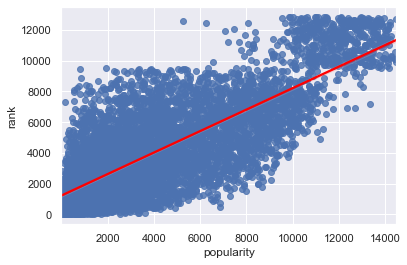

In [11]:
# ratings versus popularity regression plot
sb.set(color_codes=True)
ax = sb.regplot(x="popularity", y="rank", data=anime_df,line_kws={'color':'red'})

In [12]:
# anime_df sorted by rank
anime_sorted_rank_df = anime_df.sort_values(by=['rank'])
anime_sorted_rank_df

anime_id                                              title  \
1261      5114                   Fullmetal Alchemist: Brotherhood   
529      32281                                     Kimi no Na wa.   
639      28977                                           Gintama°   
2953     30484                                      Steins;Gate 0   
1475      9253                                        Steins;Gate   
...        ...                                                ...   
6575     19857  Kagachi-sama Onagusame Tatematsurimasu: Netora...   
6581      5054  Kojin Jugyou The Animation: Schoolgirl Ready f...   
6602      3050                                   Panchira Teacher   
6619     13595             Suki de Suki de, Suki de The Animation   
6663     37405                            Dokidoki Little Ooyasan   

                         title_english  \
1261  Fullmetal Alchemist: Brotherhood   
529                         Your Name.   
639                   Gintama Season 4   
2953                               NaN   
1475                       Steins;Gate   
...                                ...   
6575                               NaN   
6581                               NaN   
6602               Panty Flash Teacher   
6619                               NaN   
6663                               NaN   

                                         title_japanese  \
1261                         鋼の錬金術師 FULLMETAL ALCHEMIST   
529                                               君の名は。   
639                                                 銀魂°   
2953                                      シュタインズ・ゲート ゼロ   
1475                                        STEINS;GATE   
...                                                 ...   
6575               かがち様お慰め奉ります ~寝取られ村淫夜噺~ THE ANIMATION   
6581  個人授業 THE ANIMATION～Schoolgirl ready for a priv...   
6602                                         パンチラティーチャー   
6619                          好きで好きで, すきで THE ANIMATION   
6663                                    dokidokiりとる大家さん   

                                         title_synonyms  \
1261  Hagane no Renkinjutsushi: Fullmetal Alchemist,...   
529                                                 NaN   
639                                Gintama&#039; (2015)   
2953                                   Steins,Gate Zero   
1475                                                NaN   
...                                                 ...   
6575                                                NaN   
6581                                       Kojin Jugyou   
6602                                                NaN   
6619                                                NaN   
6663                                                NaN   

                                              image_url   type        source  \
1261  https://myanimelist.cdn-dena.com/images/anime/...     TV         Manga   
529   https://myanimelist.cdn-dena.com/images/anime/...  Movie      Original   
639   https://myanimelist.cdn-dena.com/images/anime/...     TV         Manga   
2953  https://myanimelist.cdn-dena.com/images/anime/...     TV  Visual novel   
1475  https://myanimelist.cdn-dena.com/images/anime/...     TV  Visual novel   
...                                                 ...    ...           ...   
6575  https://myanimelist.cdn-dena.com/images/anime/...    OVA  Visual novel   
6581  https://myanimelist.cdn-dena.com/images/anime/...    OVA         Manga   
6602  https://myanimelist.cdn-dena.com/images/anime/...    OVA      Original   
6619  https://myanimelist.cdn-dena.com/images/anime/...    OVA         Manga   
6663  https://myanimelist.cdn-dena.com/images/anime/...    OVA         Other   

      episodes            status  ...                  broadcast  \
1261        64   Finished Airing  ...     Sundays at 17:00 (JST)   
529          1   Finished Airing  ...                        NaN   
639         51   Finished Airing  ...  Wednesdays at 18:00 (JST)   
2953        23  Curre

In [13]:
# anime_df sorted by popularity
anime_sorted_popularity_df = anime_df.sort_values(by=['popularity'])
anime_sorted_popularity_df

anime_id                                              title  \
3802      1535                                         Death Note   
3897     16498                                 Shingeki no Kyojin   
3009     11757                                   Sword Art Online   
1261      5114                   Fullmetal Alchemist: Brotherhood   
4215     30276                                      One Punch Man   
...        ...                                                ...   
6648     37859  Free! Movie 2: Timeless Medley - Yakusoku: Cha...   
6644     37860    Free!: Take Your Marks: Character Butai Aisatsu   
6640     37814     Inazuma Eleven Reloaded: Reformation of Soccer   
6659     37493                              Watashitachi no Mirai   
6661     37494                             Chikyuu to no Yakusoku   

                         title_english  \
3802                        Death Note   
3897                   Attack on Titan   
3009                  Sword Art Online   
1261  Fullmetal Alchemist: Brotherhood   
4215                     One Punch Man   
...                                ...   
6648                               NaN   
6644                               NaN   
6640                               NaN   
6659                               NaN   
6661                               NaN   

                                title_japanese  \
3802                                     デスノート   
3897                                     進撃の巨人   
3009                              ソードアート・オンライン   
1261                鋼の錬金術師 FULLMETAL ALCHEMIST   
4215                                    ワンパンマン   
...                                        ...   
6648  劇場版 Free!-Timeless Medley- 約束 キャラクター舞台挨拶   
6644     特別版 Free!-Take Your Marks- キャラクター舞台挨拶   
6640             イナズマイレブン リローデッド ～サッカーの変革へんかく～   
6659                                    私たちの未来   
6661                                    地球との約束   

                                         title_synonyms  \
3802                                                 DN   
3897                                                AoT   
3009                                         S.A.O, SAO   
1261  Hagane no Renkinjutsushi: Fullmetal Alchemist,...   
4215                  One Punch-Man, One-Punch Man, OPM   
...                                                 ...   
6648                                                NaN   
6644                                                NaN   
6640                                                NaN   
6659                                                NaN   
6661                                                NaN   

                                              image_url     type       source  \
3802  https://myanimelist.cdn-dena.com/images/anime/...       TV        Manga   
3897  https://myanimelist.cdn-dena.com/images/anime/...       TV        Manga   
3009  https://myanimelist.cdn-dena.com/images/anime/...       TV  Light novel   
1261  https://myanimelist.cdn-dena.com/images/anime/...       TV        Manga   
4215  https://myanimelist.cdn-dena.com/images/anime/...       TV    Web manga   
...                                                 ...      ...          ...   
6648  https://myanimelist.cdn-dena.com/images/anime/...    Movie     Original   
6644  https://myanimelist.cdn-dena.com/images/anime/...    Movie     Original   
6640  https://myanimelist.cdn-dena.com/images/anime/...  Special         Game   
6659  https://myanimelist.cdn-dena.com/images/anime/...      OVA     Original   
6661  https://myanimelist.cdn-dena.com/images/anime/...      OVA     Original   

      episodes           status  ...                  broadcast  \
3802        37  Finished Airing  ...  Wednesdays at 00:56 (JST)   
3897        25  Finished Airing  ...     Sundays at 01:58 (JST)   
3009        25  Finished Airing  ...     Sundays at 00:00 (JST)   
1261        64  Finished Airing  ...     Sundays at 17:00 (JST)   
4215        12  Finished Airing  ...     Mondays at 01

Because we are primarily concerned with how highly rated an anime is, we will be focussing on the rank of an anime. In the following section, it is further established that popular anime is generally high in rank.

#### **1.1.1** Correlation of Feature Variables

These are correlation tables for the quantatative variables that we will use for analysis.

anime_id  episodes    airing     score  scored_by      rank  \
anime_id         1.000000 -0.109610  0.223734 -0.223733  -0.046057  0.274671   
episodes        -0.109610  1.000000 -0.037289  0.076875   0.068544 -0.049064   
airing           0.223734 -0.037289  1.000000 -0.066910  -0.046482  0.100467   
score           -0.223733  0.076875 -0.066910  1.000000   0.381926 -0.898747   
scored_by       -0.046057  0.068544 -0.046482  0.381926   1.000000 -0.356686   
rank             0.274671 -0.049064  0.100467 -0.898747  -0.356686  1.000000   
popularity       0.205813 -0.009545  0.079229 -0.688492  -0.425719  0.777302   
members         -0.032301  0.079572 -0.030711  0.415626   0.987107 -0.391524   
favorites       -0.054066  0.106804 -0.004717  0.256094   0.793949 -0.208503   
duration_min    -0.205838 -0.105711 -0.086957  0.298989   0.046203 -0.294528   
aired_from_year  0.623290 -0.147920  0.142681  0.042159   0.110892 -0.063543   

                 popularity   members  favorites  duration_min  \
anime_id           0.205813 -0.032301  -0.054066     -0.205838   
episodes          -0.009545  0.079572   0.106804     -0.105711   
airing             0.079229 -0.030711  -0.004717     -0.086957   
score             -0.688492  0.415626   0.256094      0.298989   
scored_by         -0.425719  0.987107   0.793949      0.046203   
rank               0.777302 -0.391524  -0.208503     -0.294528   
popularity         1.000000 -0.474798  -0.210745     -0.159596   
members           -0.474798  1.000000   0.781565      0.039457   
favorites         -0.210745  0.781565   1.000000      0.002669   
duration_min      -0.159596  0.039457   0.002669      1.000000   
aired_from_year   -0.236951  0.135725   0.031254     -0.183812   

                 aired_from_year  
anime_id                0.623290  
episodes               -0.147920  
airing                  0.142681  
score                   0.042159  
scored_by               0.110892  
rank                   -0.063543  
popularity             -0.236951  
members                 0.135725  
favorites               0.031254  
duration_min           -0.183812  
aired_from_year         1.000000

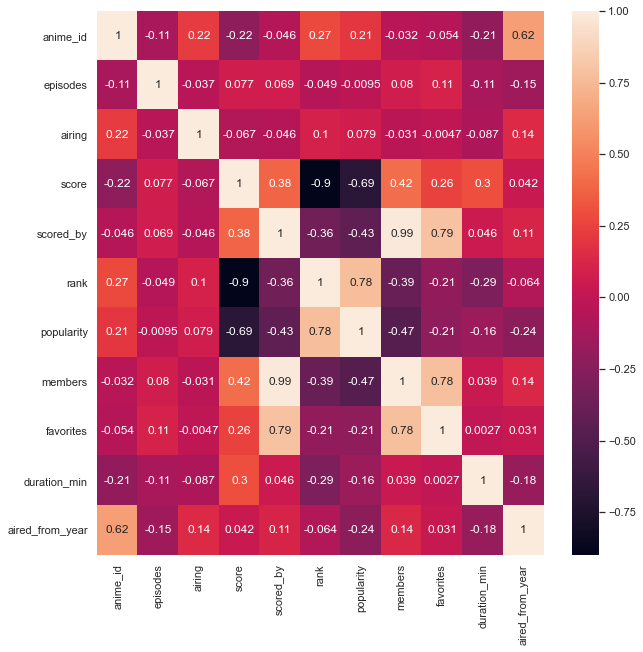

In [14]:
anime_corr = anime_df.corr(method='pearson')

# heatmap for easier visualization
sb.set(rc={'figure.figsize':(10,10)})
sb.heatmap(anime_corr, annot=True)

# correlation matrix
anime_corr

As we can see in the correlation matrix above, the correlation between rank and popularity is 0.777302, indicating that there is a significant association between the rank of an anime and its popularity. 

#### **1.1.2** Statistics for Each Column

In [15]:
anime_df.describe()

anime_id     episodes        score     scored_by          rank  \
count   6668.000000  6668.000000  6668.000000  6.668000e+03   6312.000000   
mean   15064.977804    14.276395     6.848998  2.403501e+04   4327.645120   
std    13161.364001    40.906929     0.927448  6.112103e+04   3170.699074   
min        1.000000     0.000000     0.000000  0.000000e+00      1.000000   
25%     2592.000000     1.000000     6.350000  6.812500e+02   1710.750000   
50%    10401.500000     6.000000     6.930000  3.966000e+03   3754.500000   
75%    30301.250000    13.000000     7.460000  1.976075e+04   6338.500000   
max    37896.000000  1818.000000     9.520000  1.009477e+06  12856.000000   

         popularity       members      favorites  duration_min  \
count   6668.000000  6.668000e+03    6668.000000   6668.000000   
mean    4479.515897  4.749037e+04     670.365627     28.442167   
std     3453.338080  1.051211e+05    3823.072834     25.365980   
min        1.000000  1.800000e+01       0.000000      0.000000   
25%     1691.750000  2.222750e+03       3.000000     17.000000   
50%     3629.500000  1.033650e+04      21.000000     24.000000   
75%     6630.250000  4.336000e+04     142.000000     27.000000   
max    14468.000000  1.456378e+06  106895.000000    163.000000   

       aired_from_year  
count      6668.000000  
mean       2006.915267  
std          10.381425  
min        1942.000000  
25%        2003.000000  
50%        2010.000000  
75%        2015.000000  
max        2018.000000

### **1.2** Score Distribution of All Data

This is the distribution of scores created by the users according to the dataframe. The average score is **6.848998200359928** for all scores according to the distribution.

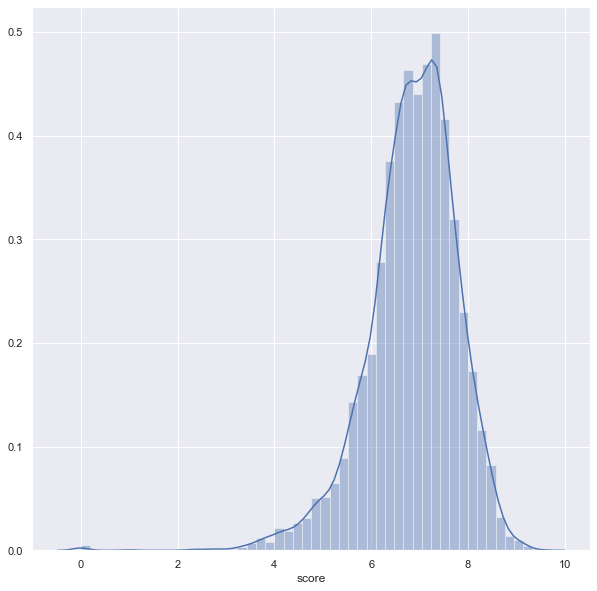

In [16]:
# distribution plot of scores
ax = sb.distplot(anime_df['score'])

In [17]:
# mean of scores
average_score = anime_df['score'].mean()
average_score

6.848998200359928

### **1.3** Scores and Rank by Qualatative Variables
We want to visualize the categorical variables that can contribute to an anime's popularity. Although we cannot build models on categorical variables, it is helpful to visualize what factors contribute to an anime's popularity currently.

Here, we see the distribution and means of the categorical variables that I think have the most impact on an anime's popularity, which are:
1. Genre
2. Production Studio
3. Year of Airing
4. Name of Anime

Note that the Name of Anime categorical variable depends on the viewer Animelists and ratings, which will require merging `anime_df` and `animelist_df`.

#### **1.3.1** Genres
TODO: description of genres

TODO: genres

In [93]:
# boxplot of mean scores per genre
# NOTE: click to enlarge for detailed view
sb.set(rc={'figure.figsize':(700,60)})
sb.set(style="whitegrid")
ax = sb.boxplot(x='genre', y='score', data=anime_df)

As shown in this plot, there are a lot of different genres that are evaluted by the different combinations in which they are listed.

As you can see by expanding the plot above (which is essentially max size–we won't be able to actually view the genre names, unfortunatley), it is not incredibly useful to view the data as is by genre because of all the different combinations of genres available. In order to make the data useful as feature variables, we will split the genres listed such that each row contains one listed genre, listed by each unique anime.

We plot the split columns as follows.

In [ ]:
# TODO plot columns

In [19]:
# mean rank per genre
# TODO

#### **1.3.2** Production Studio
TODO: description of genres

In [20]:
# boxplot of mean scores per studio
# NOTE: click on image to enlarge for detailed view
sb.set(style="whitegrid")
sb.set(rc={'figure.figsize':(700,60)})
ax = sb.boxplot(x='studio', y='score', data=anime_df)

In [21]:
# sorted by the highest ranked production studio
anime_studio_means = anime_df[['rank','studio']].groupby(['studio']).mean()
anime_studio_means = anime_studio_means.sort_values(by=['rank'])
anime_studio_means

rank
studio                                
Artland, Magic Bus                 6.0
J.C.Staff, Egg Firm               65.5
Studio Chizu                      68.0
Madhouse, Satelight, Graphinica   92.0
Xebec, AIC                       131.0
...                                ...
Sugar Boy, Blue Cat                NaN
Suzuki Mirano                      NaN
T-Rex                              NaN
Triple X                           NaN
Y.O.U.C                            NaN

[711 rows x 1 columns]

In [22]:
# number of anime produced by each studio
anime_year_counts = anime_df[['rank', 'studio']].groupby(['studio']).count()
anime_year_counts = anime_year_counts.sort_values(['rank'], ascending=False)
anime_year_counts

rank
studio                   
Toei Animation        403
Sunrise               277
Madhouse              241
Studio Pierrot        235
J.C.Staff             231
...                   ...
Chippai                 0
Circle Tribute          0
Majin                   0
Collaboration Works     0
Media Bank              0

[711 rows x 1 columns]

In [23]:
# distribution of number of anime produced by each production studio
# TODO

From the boxplot above, we can see that some studios produce anime that is more highly rated. As such, our modelling should include the studio as a categorical variable.

#### **1.3.3** Airing Year
The airing year refers to the year that the anime is released. Anime may have differing popularities depending on recency, and the following EDA serves to provide some analysis as to whether airing date affects rank or not.

In [24]:
# boxplot of mean scores per year
# NOTE: click on image to enlarge for detailed view
sb.set(rc={'figure.figsize':(300,60)})
ax = sb.boxplot(x='aired_from_year', y='score', data=anime_df)

In [25]:
# distribution of number of scores per airing year
# TODO

In [26]:
# sorted by the highest ranked airing years
anime_year_means = anime_df[['rank', 'aired_from_year']].groupby(['aired_from_year']).mean()
anime_year_means = anime_year_means.sort_values(by=['rank'], ascending=True)
anime_year_means

rank
aired_from_year              
1978.0            3068.272727
2008.0            3143.991031
1995.0            3156.274194
2007.0            3435.382883
2005.0            3464.925714
...                       ...
1944.0            8749.000000
1943.0            8978.500000
1962.0            9606.000000
1942.0           10114.000000
1961.0           11453.000000

[66 rows x 1 columns]

In [27]:
# number of anime aired in each year
anime_year_counts = anime_df[['rank', 'aired_from_year']].groupby(['aired_from_year']).count()
anime_year_counts

rank
aired_from_year      
1942.0              1
1943.0              2
1944.0              1
1945.0              1
1957.0              1
...               ...
2014.0            403
2015.0            463
2016.0            546
2017.0            496
2018.0            191

[66 rows x 1 columns]

From the outputs of the box plots and the sorting by rank, it appears that there is not a significant impact of airing day on popularity. Thus, we will not be using airing date as a categorical variable in our analysis.

#### **1.3.4** Source

Source refers to the original source for the given anime (ie. the anime that the source was adapted from).

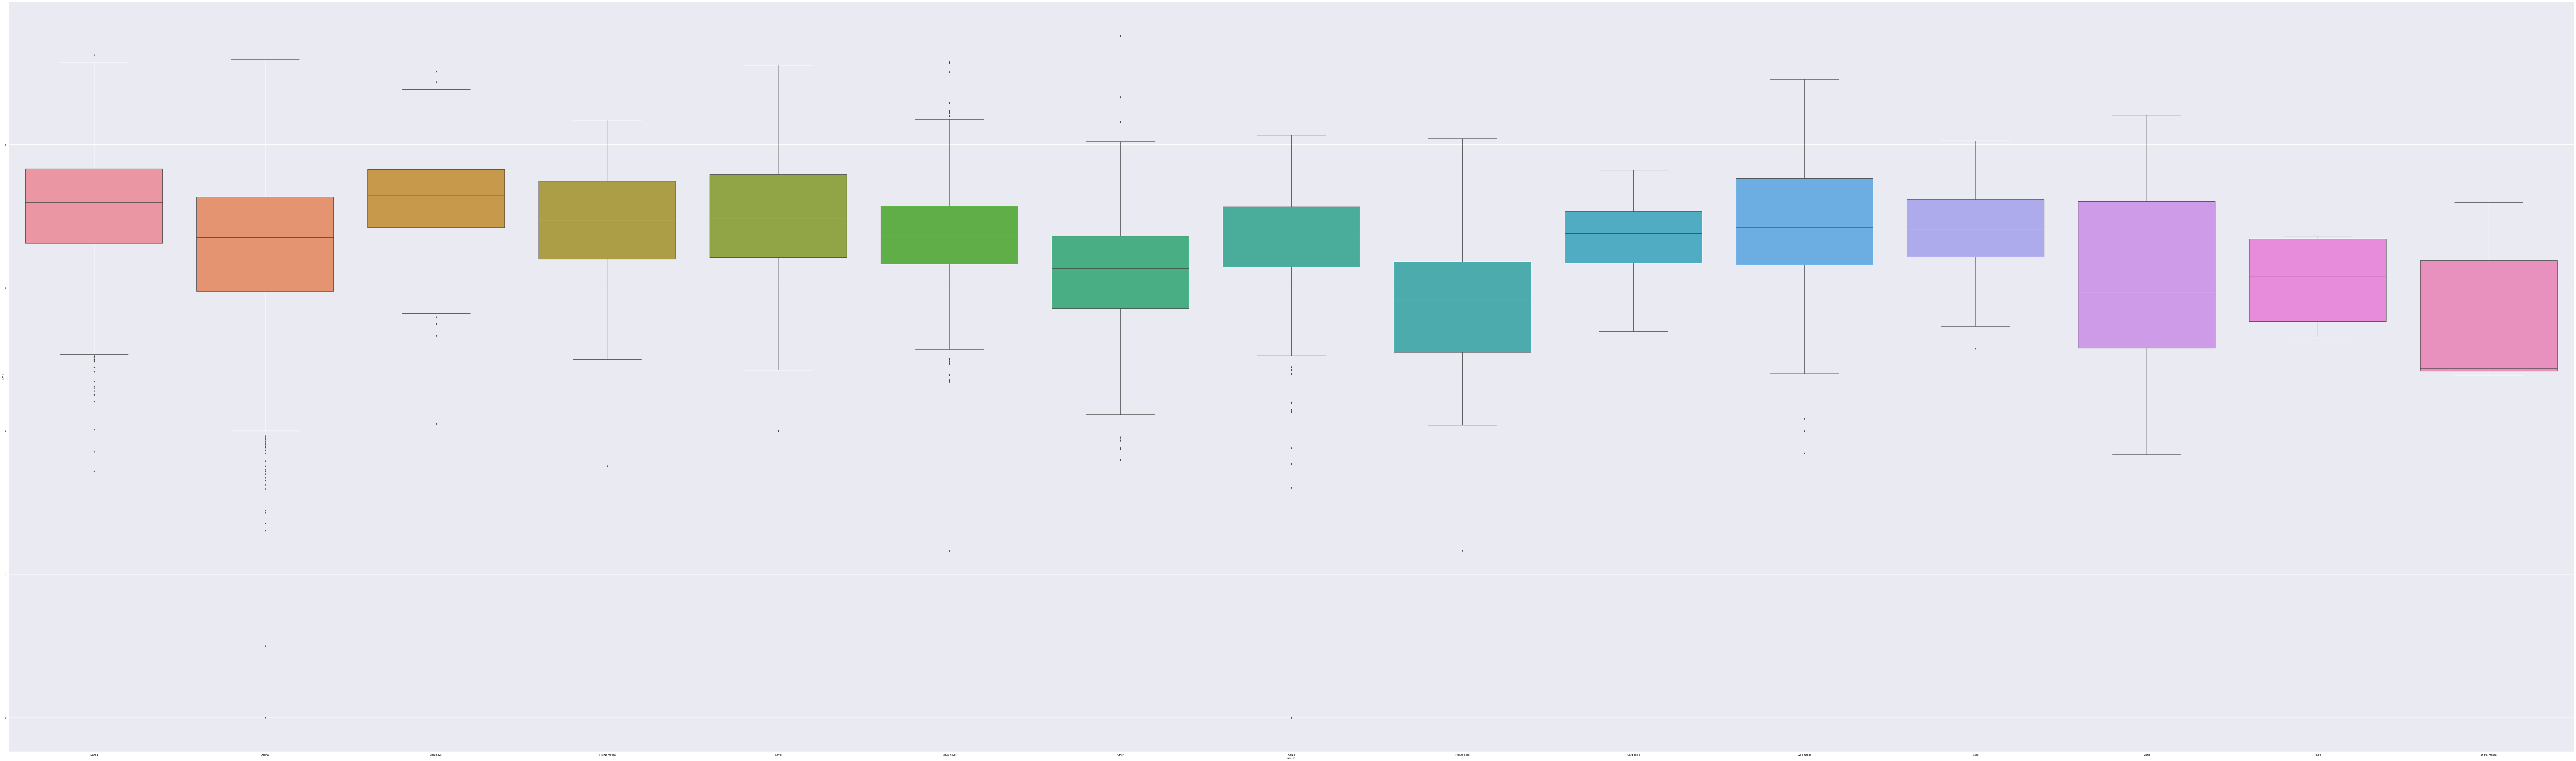

In [28]:
sb.set(rc={'figure.figsize':(200,60)})
ax = sb.boxplot(x='source', y='score', data=anime_df)

In [29]:
# sorted by the highest ranked sources
anime_source_means = anime_df[['rank', 'source']].groupby(['source']).mean()
anime_source_means = anime_year_means.sort_values(by=['rank'], ascending=True)
anime_source_means

rank
aired_from_year              
1978.0            3068.272727
2008.0            3143.991031
1995.0            3156.274194
2007.0            3435.382883
2005.0            3464.925714
...                       ...
1944.0            8749.000000
1943.0            8978.500000
1962.0            9606.000000
1942.0           10114.000000
1961.0           11453.000000

[66 rows x 1 columns]

### **1.4** Title Frequency

This is for evaluation of ratings per title by users per anime title.

In [30]:
# sb.set(rc={'figure.figsize':(800,60)})
# matplotlib.rcParams.update(
#     {
#         'text.usetex': False,
#         'font.family': 'stixgeneral',
#         'mathtext.fontset': 'stix',
#     }
# )
# ax = sb.boxplot(x='title', y='score', data=merged_anime_df)

# TODO: fix this pls

## **2.** Feature Selection/Extraction

**notes:**
* sort by popularity

for reference, the columns are:

['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme', 'duration_min',
       'aired_from_year']

### **2.1** Dropping Uncessary Categorical Variables

In [31]:
# dropping uncessary features
# new_anime_df = merged_anime_df.groupby(['source'])
new_anime_df = merged_anime_df[['anime_id', 'username', 'title', 'score', 'scored_by', 'rank', 'popularity', 'members', 'source', 'favorites', 'studio', 'genre']]
new_anime_df

anime_id          username                            title  score  \
2713527       1575          SanGoten  Code Geass: Hangyaku no Lelouch   8.79   
30896968     18039     pantythief666                       Rescue Me!   6.06   
11389752        47          PervySan                            Akira   8.16   
22030059     20047          lolibuns                     Sakura Trick   7.15   
19160353     23133          Niji-san           M3: Sono Kuroki Hagane   6.69   
...            ...               ...                              ...    ...   
18222350     35849          OtakuBaz            Darling in the FranXX   8.17   
14357224        43            zhenya               Ghost in the Shell   8.35   
17520468     28735  IndianAnimeReker    Shouwa Genroku Rakugo Shinjuu   8.63   
20995678      3389          Lumbagor                        Bus Gamer   6.62   
14555645       514          dewbites              Cossette no Shouzou   6.95   

          scored_by    rank  popularity  members        source  favorites  \
2713527      627740    30.0           9   986897      Original      63614   
30896968      10002  7216.0        2781    18381         Manga          7   
11389752     190829   352.0         198   310133         Manga       5029   
22030059      67365  3008.0         567   146435  4-koma manga       1165   
19160353      13314  4803.0        1645    44827      Original         82   
...             ...     ...         ...      ...           ...        ...   
18222350      76973   342.0         239   276912      Original       4991   
14357224     182809   192.0         174   329663         Manga       7755   
17520468      47463    66.0         590   141260         Manga       3259   
20995678      12905  5101.0        2511    22317         Manga         38   
14555645      21139  3732.0        1568    48107      Original        314   

                                      studio  \
2713527                              Sunrise   
30896968                 Hoods Entertainment   
11389752                 Tokyo Movie Shinsha   
22030059                         Studio Deen   
19160353                           Satelight   
...                                      ...   
18222350  A-1 Pictures, Trigger, CloverWorks   
14357224                      Production I.G   
17520468                         Studio Deen   
20995678                               Anpro   
14555645                               Daume   

                                                      genre  
2713527   Action, Military, Sci-Fi, Super Power, Drama, ...  
30896968                              Ecchi, Harem, Romance  
11389752  Action, Military, Sci-Fi, Adventure, Horror, S...  
22030059  Slice of Life, Comedy, Romance, School, Seinen...  
19160353  Action, Sci-Fi, Mystery, Psychological, Drama,...  
...                                                     ...  
18222350                       Action, Sci-Fi, Drama, Mecha  
14357224  Action, Sci-Fi, Police, Psychological, Mecha, ...  
17520468                           Drama, Historical, Josei  
20995678                                             Action  
14555645  Drama, Horror, Magic, Psychological, Romance, ...  

[312840 rows x 12 columns]

### **2.2** Encoding Categorical Variables

We have to encode the categorical variables also going to be used for our analysis. This includes:
* Genre
* Studio
* Title of Anime

In [32]:
# studio
encoder = LabelEncoder()
studio_labels = encoder.fit_transform(new_anime_df['studio'])

# mappings
studio_mappings = {
    index: label for index, label in enumerate(encoder.classes_)
}
studio_mappings # from the output, there are 710 studios in total

{0: '10Gauge',
 1: '2:10 Animation',
 2: '8bit',
 3: 'A-1 Pictures',
 4: 'A-1 Pictures, Bridge',
 5: 'A-1 Pictures, CloverWorks',
 6: 'A-1 Pictures, Ordet',
 7: 'A-1 Pictures, TROYCA',
 8: 'A-1 Pictures, Trigger, CloverWorks',
 9: 'A-Real',
 10: 'A.C.G.T.',
 11: 'ACC Production',
 12: 'AIC',
 13: 'AIC A.S.T.A.',
 14: 'AIC Build',
 15: 'AIC Classic',
 16: 'AIC Frontier',
 17: 'AIC Plus+',
 18: 'AIC Spirits',
 19: 'AIC Spirits, Asread',
 20: 'AIC Spirits, BeSTACK',
 21: 'AIC Spirits, Digital Frontier',
 22: 'AIC Spirits, Group TAC',
 23: 'AIC Takarazuka',
 24: 'AIC, APPP',
 25: 'AIC, Animate Film',
 26: 'AIC, Artmic',
 27: 'AIC, Artmic, Animate Film',
 28: 'AIC, Artmic, Darts',
 29: 'AIC, BeSTACK',
 30: 'AIC, Darts',
 31: 'AIC, Remic',
 32: 'AIC, Studio Hakk',
 33: 'APPP',
 34: 'AT-2',
 35: 'AXsiZ',
 36: 'Actas',
 37: 'Actas, Bee Media',
 38: 'Actas, Studio 3Hz',
 39: 'Actas, SynergySP',
 40: 'Agent 21',
 41: 'Ajia-Do',
 42: 'Ajia-Do, Group TAC',
 43: 'Ajia-Do, Studio Deen',
 44: 'An Der

In [33]:
# source
source_labels = encoder.fit_transform(new_anime_df['source'])

# mappings
source_mappings = {
    index: label for index, label in enumerate(encoder.classes_)
}
source_mappings

{0: '4-koma manga',
 1: 'Book',
 2: 'Card game',
 3: 'Digital manga',
 4: 'Game',
 5: 'Light novel',
 6: 'Manga',
 7: 'Music',
 8: 'Novel',
 9: 'Original',
 10: 'Other',
 11: 'Picture book',
 12: 'Radio',
 13: 'Visual novel',
 14: 'Web manga'}

In [34]:
# title
title_labels = encoder.fit_transform(new_anime_df['title'])

# mappings
title_mappings = {
    index: label for index, label in enumerate(encoder.classes_)
}
title_mappings

{0: '"Bungaku Shoujo" Kyou no Oyatsu: Hatsukoi',
 1: '"Bungaku Shoujo" Memoire',
 2: '"Bungaku Shoujo" Movie',
 3: '"Eiyuu" Kaitai',
 4: '.hack//G.U. Returner',
 5: '.hack//Gift',
 6: '.hack//Intermezzo',
 7: '.hack//Liminality',
 8: '.hack//Quantum',
 9: '.hack//Quantum: Sore ike! Bokura no Chimuchimu-chan!!',
 10: '.hack//Roots',
 11: '.hack//Sign',
 12: '.hack//Tasogare no Udewa Densetsu',
 13: '.hack//Unison',
 14: '009-1',
 15: '07-Ghost',
 16: '1+2=Paradise',
 17: '100% Pascal-sensei (TV)',
 18: '1000-nen Joou: Queen Millennia',
 19: '11eyes',
 20: '11eyes Picture Drama',
 21: '11eyes: Momoiro Genmutan',
 22: '12-sai.',
 23: '12-sai. 2nd Season',
 24: '12-sai.: Chicchana Mune no Tokimeki',
 25: '12-sai.: Chicchana Mune no Tokimeki 2nd Season',
 26: '15 Bishoujo Hyouryuuki',
 27: '18if',
 28: '21-ji no Onna: Newscaster Katsuragi Miki',
 29: '25-sai no Joshikousei',
 30: '3-Nen D-Gumi Glass no Kamen',
 31: '3-gatsu no Lion',
 32: '3-gatsu no Lion 2nd Season',
 33: '3-gatsu no Lion 

In [35]:
new_anime_df['studio_labels'] = studio_labels
new_anime_df['source_labels'] = source_labels
new_anime_df['title_labels'] = title_labels

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### **2.3** Score Threshold

#### **2.3.1** Updated Correlations

anime_id     score  scored_by      rank  popularity   members  \
anime_id       1.000000 -0.071818  -0.025726  0.097500   -0.028723 -0.013706   
score         -0.071818  1.000000   0.481106 -0.950334   -0.542570  0.513988   
scored_by     -0.025726  0.481106   1.000000 -0.405722   -0.514282  0.988469   
rank           0.097500 -0.950334  -0.405722  1.000000    0.552803 -0.437696   
popularity    -0.028723 -0.542570  -0.514282  0.552803    1.000000 -0.561665   
members       -0.013706  0.513988   0.988469 -0.437696   -0.561665  1.000000   
favorites     -0.101743  0.460448   0.828085 -0.331089   -0.319582  0.830157   
studio_labels -0.054076  0.013325  -0.060183 -0.014761    0.080301 -0.070441   
source_labels -0.053248 -0.028809  -0.007637  0.054952    0.065358 -0.008397   
title_labels   0.023992  0.010750  -0.049637 -0.010364    0.047992 -0.050807   

               favorites  studio_labels  source_labels  title_labels  
anime_id       -0.101743      -0.054076      -0.053248      0.023992  
score           0.460448       0.013325      -0.028809      0.010750  
scored_by       0.828085      -0.060183      -0.007637     -0.049637  
rank           -0.331089      -0.014761       0.054952     -0.010364  
popularity     -0.319582       0.080301       0.065358      0.047992  
members         0.830157      -0.070441      -0.008397     -0.050807  
favorites       1.000000      -0.011247       0.046869     -0.035514  
studio_labels  -0.011247       1.000000       0.074345      0.020402  
source_labels   0.046869       0.074345       1.000000     -0.009524  
title_labels   -0.035514       0.020402      -0.009524      1.000000

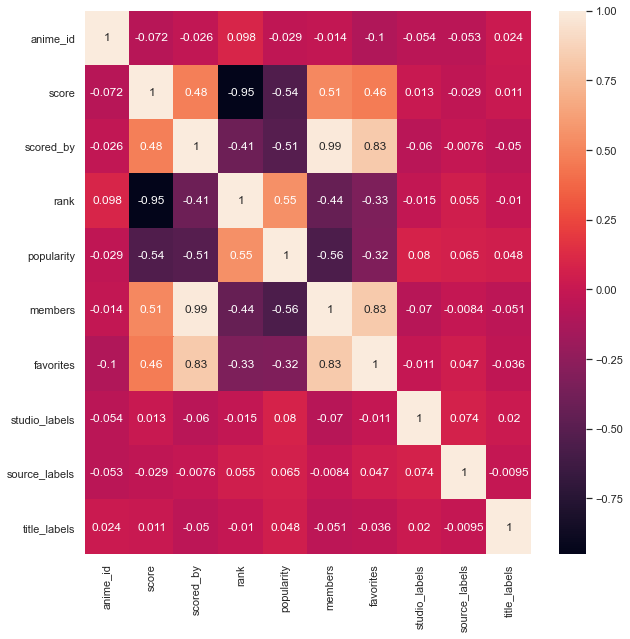

In [36]:
# updated correlation heatmap based on feature variables
updated_anime_corr = new_anime_df.corr(method='pearson')

# heatmap for easier visualization
sb.set(rc={'figure.figsize':(10,10)})
sb.heatmap(updated_anime_corr, annot=True)

# correlation matrix
updated_anime_corr

#### **2.3.2** Score Mean Threshold

Because the feature variables yielded little correlation to the outcome variable (ie. score), we are only going to investigate the anime whose rating pass a threshold. We denote these anime with a binary measure, denoted `above_average`, added to `new_anime_df`.

In [37]:
new_anime_df['score'].mean()

7.578264959723822

In [38]:
# average score is 7.58
# 1 for above average score, 0 for below
pd.options.mode.chained_assignment = None
new_anime_df['above_average'] = np.where(new_anime_df['score'] >= 7.58, '1', '0')
new_anime_df

anime_id          username                            title  score  \
2713527       1575          SanGoten  Code Geass: Hangyaku no Lelouch   8.79   
30896968     18039     pantythief666                       Rescue Me!   6.06   
11389752        47          PervySan                            Akira   8.16   
22030059     20047          lolibuns                     Sakura Trick   7.15   
19160353     23133          Niji-san           M3: Sono Kuroki Hagane   6.69   
...            ...               ...                              ...    ...   
18222350     35849          OtakuBaz            Darling in the FranXX   8.17   
14357224        43            zhenya               Ghost in the Shell   8.35   
17520468     28735  IndianAnimeReker    Shouwa Genroku Rakugo Shinjuu   8.63   
20995678      3389          Lumbagor                        Bus Gamer   6.62   
14555645       514          dewbites              Cossette no Shouzou   6.95   

          scored_by    rank  popularity  members        source  favorites  \
2713527      627740    30.0           9   986897      Original      63614   
30896968      10002  7216.0        2781    18381         Manga          7   
11389752     190829   352.0         198   310133         Manga       5029   
22030059      67365  3008.0         567   146435  4-koma manga       1165   
19160353      13314  4803.0        1645    44827      Original         82   
...             ...     ...         ...      ...           ...        ...   
18222350      76973   342.0         239   276912      Original       4991   
14357224     182809   192.0         174   329663         Manga       7755   
17520468      47463    66.0         590   141260         Manga       3259   
20995678      12905  5101.0        2511    22317         Manga         38   
14555645      21139  3732.0        1568    48107      Original        314   

                                      studio  \
2713527                              Sunrise   
30896968                 Hoods Entertainment   
11389752                 Tokyo Movie Shinsha   
22030059                         Studio Deen   
19160353                           Satelight   
...                                      ...   
18222350  A-1 Pictures, Trigger, CloverWorks   
14357224                      Production I.G   
17520468                         Studio Deen   
20995678                               Anpro   
14555645                               Daume   

                                                      genre  studio_labels  \
2713527   Action, Military, Sci-Fi, Super Power, Drama, ...            519   
30896968                              Ecchi, Harem, Romance            207   
11389752  Action, Military, Sci-Fi, Adventure, Horror, S...            579   
22030059  Slice of Life, Comedy, Romance, School, Seinen...            462   
19160353  Action, Sci-Fi, Mystery, Psychological, Drama,...            408   
...                                                     ...            ...   
18222350                       Action, Sci-Fi, Drama, Mecha              8   
14357224  Action, Sci-Fi, Police, Psychological, Mecha, ...            373   
17520468                           Drama, Historical, Josei            462   
20995678                                             Action             50   
14555645  Drama, Horror, Magic, Psychological, Romance, ...            126   

          source_labels  title_labels above_average  
2713527               9           871             1  
30896968              6          4362             0  
11389752              6           160             1  
22030059              0          4505             0  
19160353              9          3104             0  
...                 ...           ...           ...  
18222350              9          1021             1  
14357224              6          1653             1  
17520468              6          4824             1  
20995678              6           674             0  
14555645        

## **3.** Modelling 

### **3.1** Baseline Model: Linear Regression

#### **3.1.1** Training, Test, and Validation Sets

In [39]:
features = new_anime_df[['title_labels', 'scored_by', 'popularity', 'members', 'source_labels', 'favorites', 'studio_labels']].copy()
labels = new_anime_df['above_average']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
# TODO: update test size and random state with JUSTIFICATIONS

In [41]:
# only used for validation at the end - ie. for unseen validation data
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
# TODO: update test size and random state with JUSTIFICATION

#### **3.1.2** Linear Regression

In [42]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

In [68]:
# comparison of output values
lr_df = pd.DataFrame({'actual': y_test.values.flatten(), 'predicted': y_pred.flatten()})
lr_df

actual  predicted
0          1   0.650665
1          1   0.692523
2          0   0.140155
3          1   0.693007
4          0   0.416394
...      ...        ...
62563      1   0.581223
62564      0   0.559534
62565      1   0.807623
62566      1   1.128714
62567      0   0.287767

[62568 rows x 2 columns]

In [44]:
# accuracy evaluations
# mean absolute
print(metrics.mean_absolute_error(y_test, y_pred))
# mean squared error
print(metrics.mean_squared_error(y_test, y_pred))
# root mean squared error
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.3828729256954417
0.18235979899859978
0.4270360628783004


### **3.2** Random Forest Model

#### **3.2.1** Optimizing Input Parameters

In [45]:
# uses maximum depth and number 
# TODO: printing results function?

rf = RandomForestClassifier()
parameters = {
    'max_depth': [10, 20, None],
    'n_estimators': [50, 100]
}

rf_cv = GridSearchCV(rf, parameters, cv=5)
rf_cv.fit(x_train, y_train.values.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [109]:
joblib.dump(rf_cv.best_estimator_, './parameters/rf.pkl')

['./parameters/rf.pkl']

#### **3.2.2** Random Forest

In [48]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=20)
rf_model.fit(x_train, y_train)
rf_predicted_values = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, rf_predicted_values)
print(accuracy)

0.9999680347781613


TODO: fix accuracy lol

#### **3.2.3** Relative Importance of Input Variables

In [49]:
# TODO: print relative importances using rf_model
for name, val in zip(features.columns, rf_model.feature_importances_):
    print(name, ": ", val)

title_labels :  0.10095341594318617
scored_by :  0.15755304031310563
popularity :  0.14095226074397205
members :  0.16818475266856533
source_labels :  0.04558843982497554
favorites :  0.303974061262191
studio_labels :  0.08279402924400442


#### **3.2.4** Decision Tree Visualization

Used to see how the data is passed as a visualization.

In [50]:
# export_graphviz(tree, feature_names=features.columns, out_file='rf_tree.dot', filled=True)
# TODO: tree?

### **3.3** Multilayer Perceptron

Multilayer Perceptrons (MLP) are a class of feed-forward neural networks, meant to emulate the neurophysiological process by whic hthe brain processes and stores information.

TODO: write more.

**Hyperparameters:** to optimize for our model, we are going to use `hidden_layer_sizes`, which refers to the number of nodes in some hidder layer, and `activation` as the activation function.

**Activation function:** going to compute logistic and relu activations. 
TODO: more justification and discussion on this.

#### **3.3.1** MLP

In [51]:
mlp = MLPClassifier()

In [52]:
parameters = {
    'hidden_layer_sizes': [(10,), (50,)],
     'activation': ['logistic', 'relu']
}

In [53]:
# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     cluster_data(data_arr)

# TODO: why is this giving a convergence warning?
    
mlp_cv = GridSearchCV(mlp, parameters, cv=5)
mlp_cv.fit(x_train, y_train.values.ravel())

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [110]:
joblib.dump(mlp_cv.best_estimator_, './parameters/mlp.pkl')

['./parameters/mlp.pkl']

In [86]:
mlp_model = MLPClassifier()
mlp_model.fit(x_train, y_train)
mlp_predicted_values = mlp_model.predict(x_test)
score = accuracy_score(y_test,mlp_predicted_values)
print(score)

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.7125527426160337


Accuracy: TODO

#### **3.3.2** Assessing Performance

In [87]:
loss_values = mlp_model.loss_curve_
mlp_model.score

<bound method ClassifierMixin.score of MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)>

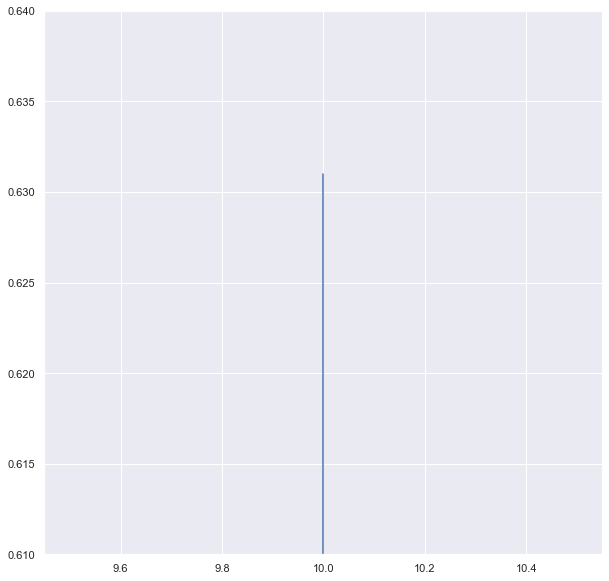

In [88]:
# plotting
plt.plot(loss_values)
plt.ylim((0.61,0.640))
plt.axvline(10,0,0.7)
plt.show()

# TODO: fix or get rid of this plot

### **3.4** Model Validation

In [89]:
# load models
models = {}
# TODO: add linear regression accuracy
for model in ['rf', 'mlp']:
    models[model] =joblib.load('./parameters/{}.pkl'.format(model))
models

{'rf': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=20, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 'mlp': MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
               beta_2=0.999, early_stopping=False, epsilon=1e-08,
               hidden_layer_sizes=(50,), learning_rate='constant',
               learning_rate_init=0.001, max_fun=15000, max_iter=200,
               momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
               power_t=0.5, random_state=None, shuffle=True, solver='adam',


In [90]:
def evaluate(name, model, features, labels):
    pred = model.predict(features)
    accuracy = accuracy_score(labels, pred)
    print('{}: accuracy: {}'.format(name, accuracy))

In [108]:
print('lr:', 'mae: ', metrics.mean_absolute_error(y_test, y_pred))
print('    mse: ', metrics.mean_squared_error(y_test, y_pred))
print('    rmse:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
for name, model in models.items():
    evaluate(name, model, x_val, y_val)
    # TODO: why is linear regression causing 0.99 accuracy score?

lr: mae:  0.3828729256954417
    mse:  0.18235979899859978
    rmse: 0.4270360628783004
rf: accuracy: 0.9999840173890807
mlp: accuracy: 0.6039668840301752


## **4.** Conclusion